<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Práctica 1</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Minería de datos</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Víctor Luque Martín <br><span style="margin-left: 30px;">Coordinación: Julià Minguillón Alfonso</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Índice de contenidos

1. [Introducción](#Introducción)

2. [Librerías Python necesarias](#Librerías-Python-necesarias)

3. [Presentación de Bank Marketing](#Presentación-de-New-Diagnosis-LLC)

    - [Descripción del dataset](#descripcion-del-dataset)
    - [Atributos del dataset](#atributos-del-dataset)

5. [Objetivo analítico](#objetivo-analítico)

6. [Verificación y Análisis Básico](#verificación-y-análisis-básico)

7. [Análisis Exploratorio de los Datos (EDA)](#análisis-exploratorio-de-los-datos-eda)

    - [Distribución de la variable objetivo](#distribución-de-la-variable-objetivo)
    - [Matriz de correlación](#matríz-de-correlación)
    - [Análisis de características](#análisis-de-características)
        - [Característica `month` (categórica)](#característica-month-categórica)
        - [Característica `age` (numérica)](#característica-age-numérica)
        - [Característica `job` (categórica)](#característica-job-categórica)
        - [Característica `marital` (categórica)](#característica-marital-categórica)
        - [Característica `education` (categórica)](#característica-education-categórica)
        - [Característica `default` (categórica)](#característica-default-categórica)
        - [Característica `housing` (categórica)](#característica-housing-categórica)
        - [Característica `loan` (categórica)](#característica-loan-categórica)
        - [Característica `contact` (categórica)](#característica-contact-categórica)
        - [Característica `day_of_week` (numérica)](#característica-day_of_week-numérica)
        - [Característica `duration` (numérica)](#característica-duration-numérica)
        - [Característica `campaign` (numérica)](#característica-campaign-numérica)
        - [Característica `pdays` (numérica)](#característica-pdays-numérica)
        - [Característica `previous` (numérica)](#característica-previous-numérica)
        - [Característica `poutcome` (categórica)](#característica-poutcome-categórica)


8. [Resumen del Análisis Exploratorio de Datos (EDA)](#resumen-del-análisis-exploratorio-de-datos-eda)

9. [Limpieza y Acondicionamiento de datos](#limpieza-y-acondicionamiento-de-datos)
    - [Eliminación de columnas innecesarias](#eliminación-de-columnas-innecesarias)
    - [Imputación de valores nulos](#imputación-de-valores-nulos)
    - [Discretización](#discretización)
    - [Normalización y Escalado](#normalización-y-escalado)
    - [Codificación de variables categóricas](#codificación-de-variables-categóricas)
    - [Rebalanceo de datos (*oversampling*)](#rebalanceo-de-datos-oversampling)

10. [Estudio de Ánalisis de Componentes Principales (PCA)](#estudio-de-ánalisis-de-componentes-principales-pca)

    - [PCA con datos originales](#pca-con-datos-originales)
    - [PCA con datos rebalanceados](#pca-con-datos-rebalanceados)

11. [Conclusiones](#conclusiones)

12. [Bibliografía](#bibliografía)

## Introducción

[[ inicio del documento ]](#Indice-de-contenidos)

Presentaremos en este documento un **flujo analítico completo y contextualizado** en el ámbito de un caso de estudio, puesto que entendemos que la analítica de datos debe enfocarse de un modo holístico donde el dato y lo que este describe forman un núcleo inseparable.  

A lo largo de la asignatura de **minería de datos** se han estudiado distintas técnicas con el objetivo de cubrir cada una de las fases que comprenden un proceso de extracción de conocimiento a partir de un juego de datos en bruto. En este *notebook* Jupyter usaremos el lenguaje Python para mostrar un flujo analítico completo de principio a fin.

Más allá de presentar un ejemplo analítico fácilmente reproducible donde se dispone de código y datos, hemos querido mantener el foco en transmitir un estilo de **buenas prácticas** para que el estudiante pueda crecer como *data scientist* siendo más efectivo y, sobre todo, **más colaborativo**.

## Librerías Python necesarias

[[ go back to the top ]](#Indice-de-contenidos)

En caso de no tener instalado Python, proponemos descargar python desde su web oficial [python.org](https://www.python.org/downloads/) y trabajar con entornos virtuales haciendo uso de librerías como `venv`, `virtualenv`, `poetry` o `uv`. En este caso haremos uso de `virtualenv` para generar nuestro entorno virtual:

| Descripción                    | Linux                                             | Windows                                                                                                         |
|--------------------------------|---------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| Instalación de virtualenv      | ```pip install virtualenv ```              | ```pip install virtualenv ```                                                                      |
| Creación del entorno virtual   | ```virtualenv -p /path/to/python .venv ``` | ```virtualenv -p C:\Path\to\python.exe .venv ```                                                   |
| Activación del entorno virtual | ```source .venv/bin/activate ```           | ```Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser``` <br>```.venv/Scripts/activate ``` |
| Instalación de Jupyter         | ```pip install notebook ```                 | ```pip install notebook ```                                                                                   |


No recomendamos el uso del software `Anaconda`, todas las librerías son facilmente instalables desde el repositorio oficial de python [PyPI](https://pypi.org/) además de que en caso de querer realizar una desinstalación de `Anaconda`, este software no se desinstala por completo del equipo, ocupando espacio innecesario y entorpeciendo el rendimiento de tu dispositivo.

Este *notebook* usa varios paquetes Python. Esta es la lista de los más relevantes:

* **NumPy**: contiene una colección de funciones que facilitan el cálculo numérico con matrices.
* **Pandas**: permite trabajar con estructuras de datos tipo *DataFrame*.
* **Scikit-learn**: se trata de una colección de funciones habituales en el mundo de la inteligencia artificial.
* **Matplotlib**: es una librería especializada en la generación de gráficos.
* **Seaborn**: contiene funciones avanzadas para la generación de gráficos estadísticos.
* **ucimlrepo**: es una librería que permite descargar datasets de la UCI Machine Learning Repository.
* **tabulate**: librería para tabular datos al mostrarlos por la terminal
* **Pandera**: librería para validar *DataFrames* de pandas.
* **imbalanced-learn**: librería para trabajar con datasets desbalanceados.
* **utils**: módulo personalizado que contiene funciones para la generación de gráficas y tablas.

Para facilitar el proceso de instalación, proveemos también de los comandos necesarios para ser usados en `pip` una vez activado el entorno virtual:

```
pip install numpy pandas scikit-learn matplotlib seaborn ucimlrepo tabulate pandera imbalanced-learn
```
    
Por defecto, pip instalará la versión más reciente de la librería, pero es posible especificarlo utilizando la siguiente sintáxis `pip install librería==1.2.3`.

**IMPORTANTE:** Se hará uso de un módulo llamado `utils` que contiene funciones para la generación de gráficas con el fin de simplificar el contenido del *notebook*. Este módulo no es parte de la librería estándar de Python, y vendrá incluido en el entregable de la práctica.

```


In [ ]:
# Descomenta la línea de abajo para realizar la instalación de las dependencias
#pip install numpy pandas scikit-learn matplotlib seaborn ucimlrepo tabulate pandera imbalanced-learn

## Presentación de Bank Marketing

[[ inicio del documento ]](#Indice-de-contenidos)

Aprovechando nuestra experiencia en minería de datos y análisis predictivo, hemos fundado Bank Marketing Analytics, una startup dedicada a ofrecer soluciones basadas en datos para optimizar las campañas de marketing en el sector bancario.

Nuestro modelo de negocio se basa en el desarrollo de modelos predictivos que ayudan a las instituciones financieras a predecir la probabilidad de que un cliente acepte ofertas de productos bancarios, como depósitos a plazo fijo. Vendemos nuestros modelos a bancos y entidades financieras que buscan aumentar la efectividad de sus campañas de marketing directo. Al predecir con mayor precisión qué clientes tienen mayor probabilidad de responder positivamente, ayudamos a nuestros clientes a optimizar recursos y maximizar su retorno de inversión.


La capacidad de personalizar las campañas según los datos históricos y demográficos de los clientes permite a los bancos tomar decisiones más informadas y eficaces. Con nuestras soluciones, los bancos pueden reducir costos operativos, aumentar la tasa de conversión y mejorar la satisfacción del cliente al ofrecerles productos relevantes en el momento adecuado.


Podemos encontrar el dataset en el siguiente en el UCI Repository: [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing).

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
bank_marketing.data.original

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  campaign  pdays  previous  \
0            NaN            5   may       261         1     -1         0   
1            NaN            5   may       151         1     -1         0   
2            NaN            5   may        76         1     -1         0   
3            NaN            5   may        92         1     -1         0   
4            NaN            5   may       198         1     -1         0   
...          ...          ...   ...       ...       ...    ...       ...   
45206   cellular           17   nov       977         3     -1         0   
45207   cellular           17   nov       456         2     -1         0   
45208   cellular           17   nov      1127         5    184         3   
45209  telephone           17   nov       508         4     -1         0   
45210   cellular           17   nov       361         2    188        11   

      poutcome    y  
0          NaN   no  
1          NaN   no  
2          NaN   no  
3          NaN   no  
4          NaN   no  
...        ...  ...  
45206      NaN  yes  
45207      NaN  yes  
45208  success  yes  
45209      NaN   no  
45210    other   no  

[45211 rows x 17 columns]

### Descripcion del Dataset

El conjunto de datos contiene la siguiente información:
- Número de instancias
- Número de atributos: 17
- Tipo de datos: Categóricos y numéricos
- Presencia de valores faltantes: No
- Periodo de recopilación: Mayo de 2008 a noviembre de 2010​

Podemos observar todos los metadatos para observar todas las características de nuestro dataset:


In [2]:
bank_marketing.metadata

{'uci_id': 222,
 'name': 'Bank Marketing',
 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing',
 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv',
 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).',
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 45211,
 'num_features': 16,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'],
 'target_col': ['y'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2014,
 'last_updated': 'Fri Aug 18 2023',
 'dataset_doi': '10.24432/C5K306',
 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'],
 'intro_paper': {'ID': 277,
  'type': 'NATIVE',
  'title': 'A data-driven a

### Atributos del Dataset

Los atributos se dividen en cuatro categorías:​

#### Datos de clientes bancarios:

- `age`: edad (numérico)
- `job`: tipo de trabajo (categórico)
- `marital`: estado civil (categórico)
- `education`: nivel de estudios (categórico)
- `default`: ¿tiene crédito en mora? (categórico)
- `balance`: saldo anual promedio (numérico)
- `housing`: ¿tiene préstamo para vivienda? (categórico)
- `loan`: ¿tiene préstamo personal? (categórico)

#### Relacionado con el último contacto de la campaña actual:

- `contact`: Tipo de comunicación de contacto(categórico)
- `month`: último mes del año del contacto (categórico)
- `day_of_week`: día de la semana del último contacto (categórico)
- `duration`: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al objetivo de salida (por ejemplo, si duration=0 entonces y='no'). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, una vez finalizada la llamada, es obvio que y se conoce. Por lo tanto, esta entrada sólo debería incluirse a efectos de evaluación comparativa y debería descartarse si la intención es tener un modelo predictivo realista.

#### Otros atributos:

- `campaign`: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
- `pdays`: número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
- `previous`: número de contactos realizados antes de esta campaña y para este cliente (numérico)
- `poutcome`: resultado de la campaña de marketing anterior (categórico)

#### Variable objetivo (o dependiente)
- `y`: ¿se ha suscrito el cliente un depósito a plazo? (binario)

Podemos obtener brevemente los detalles de las variables por UCI Repository, posteriormente las observaremos cargando el dataset en un Pandas DataFrame en Python.

In [3]:
bank_marketing.variables

name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            y   Target       Binary             None   

                                          description  units missing_values  
0                                                None   None             no  
1   type of job (categorical: 'admin.','blue-colla...   None             no  
2   marital status (categorical: 'divorced','marri...   None             no  
3   (categorical: 'basic.4y','basic.6y','basic.9y'...   None             no  
4                              has credit in default?   None             no  
5                              average yearly balance  euros             no  
6                                   has housing loan?   None             no  
7                                  has personal loan?   None             no  
8   contact communication type (categorical: 'cell...   None            yes  
9                        last contact day of the week   None             no  
10  last contact month of year (categorical: 'jan'...   None             no  
11   last contact duration, in seconds (numeric). ...   None             no  
12  number of contacts performed during this campa...   None             no  
13  number of days that passed by after the client...   None            yes  
14  number of contacts performed before this campa...   None             no  
15  outcome of the previous marketing campaign (ca...   None            yes  
16          has the client subscribed a term deposit?   None             no

## Objetivo Analítico

[[ inicio del documento ]](#Indice-de-contenidos)

En el ámbito de la minería de datos y el análisis de marketing, hemos seleccionado el conjunto de datos Bank Marketing para desarrollar un modelo predictivo que optimice las campañas de marketing directo en el sector bancario. Este conjunto de datos proviene de una campaña de marketing directo realizada por una institución bancaria portuguesa, donde se realizaron llamadas telefónicas a clientes con el objetivo de promover la suscripción a depósitos a plazo fijo.

El objetivo de este proyecto es desarrollar un modelo de **clasificación binaria** que prediga si un cliente aceptará o no una oferta de depósito a plazo fijo, basándose en las características proporcionadas. La variable objetivo es "y", donde 'yes' indica aceptación y 'no' indica rechazo.​

Este análisis puede ayudar a la institución bancaria a:​
- **Optimizar las campañas de marketing**, dirigiendo los esfuerzos hacia los clientes con mayor probabilidad de aceptar la oferta.
- **Reducir costos** operativos al evitar contactar a clientes con baja probabilidad de conversión.
- **Mejorar la eficiencia** de las campañas mediante la personalización de las ofertas según las características del cliente.

## Verificación y Análisis Básico 

[[ inicio del documento ]](#Indice-de-contenidos)

Procedemos a cargar el dataset para poder realizar un análisis básico de los datos.

In [4]:
df = bank_marketing.data.original.copy()
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  campaign  pdays  previous  \
0            NaN            5   may       261         1     -1         0   
1            NaN            5   may       151         1     -1         0   
2            NaN            5   may        76         1     -1         0   
3            NaN            5   may        92         1     -1         0   
4            NaN            5   may       198         1     -1         0   
...          ...          ...   ...       ...       ...    ...       ...   
45206   cellular           17   nov       977         3     -1         0   
45207   cellular           17   nov       456         2     -1         0   
45208   cellular           17   nov      1127         5    184         3   
45209  telephone           17   nov       508         4     -1         0   
45210   cellular           17   nov       361         2    188        11   

      poutcome    y  
0          NaN   no  
1          NaN   no  
2          NaN   no  
3          NaN   no  
4          NaN   no  
...        ...  ...  
45206      NaN  yes  
45207      NaN  yes  
45208  success  yes  
45209      NaN   no  
45210    other   no  

[45211 rows x 17 columns]

Haremos uso de la librería `pandera` para verificar nuestros datos. Esta librería permite definir un esquema de datos y validar que los datos cumplan con ese esquema. Esto es útil para asegurarse de que los datos sean consistentes y estén en el formato esperado antes de realizar análisis o modelado.

In [5]:
import pandera as pa
from pandera import Column, DataFrameSchema, Check

schema = DataFrameSchema({
    "age": Column(int, Check.ge(0)), # La edad no puede ser negativa
    "job": Column(pa.String, nullable=True), # Puede ser nulo
    "marital": Column(pa.String, nullable=True),
    "education": Column(pa.String, nullable=True),
    "default": Column(pa.String, nullable=True),
    "balance": Column(int),  # Puede ser negativo
    "housing": Column(pa.String, nullable=True),
    "loan": Column(pa.String, nullable=True),
    "contact": Column(pa.String, nullable=True),
    "day_of_week": Column(int, Check.isin(list(range(1, 32)))),
    "month": Column(pa.String, Check.isin([
        "jan", "feb", "mar", "apr", "may", "jun",
        "jul", "aug", "sep", "oct", "nov", "dec"
    ])),
    "duration": Column(int, Check.ge(0)),
    "campaign": Column(int, Check.ge(1)),
    "pdays": Column(int, Check.ge(-1)),
    "previous": Column(int, Check.ge(0)),
    "poutcome": Column(pa.String, nullable=True),
    "y": Column(pa.String, Check.isin(["yes", "no"]))
})


In [6]:
df = schema.validate(df)

Comprobamos si existen valores nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum() / len(df)

age            0.000000
job            0.006370
marital        0.000000
education      0.041074
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
contact        0.287983
day_of_week    0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.817478
y              0.000000
dtype: float64

Observamos que existen valores nulos en las características:
- `job` (0,63%)
- `education` (4,1%)
- `contact` (28,79%)
- `poutcome` (81,74%)

Para aquellas columnas con valores nulos, para el EDA reemplazaremos los valores nulos por "unknown" y para la fase de preprocesado realizaremos imputación de valores nulos en `job`, `eductation` y `contact` y eliminaremos `poutcome` ya que tiene un porcentaje muy alto de valores nulos. 

In [9]:
df.fillna("unknown", inplace=True)

In [10]:
df.describe()

age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Comprobamos si existen duplicados

In [11]:
print(f"Hay un total de {int(df.duplicated().sum())} duplicados")

Hay un total de 0 duplicados


No existen valores duplicados en el dataset.

## Análisis Exploratorio de los Datos (EDA)

[[ inicio del documento ]](#Indice-de-contenidos)

A continuación comenzamos a realizar nuestro análisis exploratorio de los datos

### Distribución de la variable objetivo

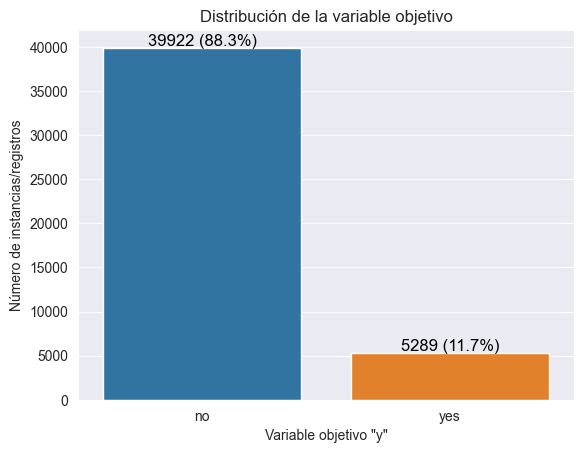

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
ax = sns.countplot(df, x='y', hue='y')
total = df.shape[0]

for p in ax.patches:
    h = p.get_height()
    per = (h / total) * 100
    ax.annotate(
        f'{h:.0f} ({per:.1f}%)',
        (p.get_x() + p.get_width() / 2., h),
        ha='center', va='center',
        fontsize=12, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title('Distribución de la variable objetivo')
plt.xlabel('Variable objetivo "y"')
plt.ylabel("Número de instancias/registros")
plt.show()

Por lo que podemos observar, el dataset se encuentra desbalanceado, porque tenemos una diferencia entre las personas que no contrataron el depósito a plazo frente a las que sí lo contrataron bastante considerable.

Si queremos realizar un futuro modelo de predicción, es importante que la variable objetivo no sea un valor categórico si no, un valor numérico. Aplicaremos la transformación de la variable objetivo a continuación:

```{python}
df['y'] = df['y'].replace({'no': 0, 'yes': 1}).astype(int)
```

In [13]:
df['y'] = df['y'].map({'no': 0, 'yes': 1}).astype(int)

**Conclusiones de la variable objetivo `y`**
- La variable objetivo es muy desbalanceada

> Para más detalle sobre el análisis visitar la sección [Análisis de Características](#análisis-de-características)

### Matríz de Correlación

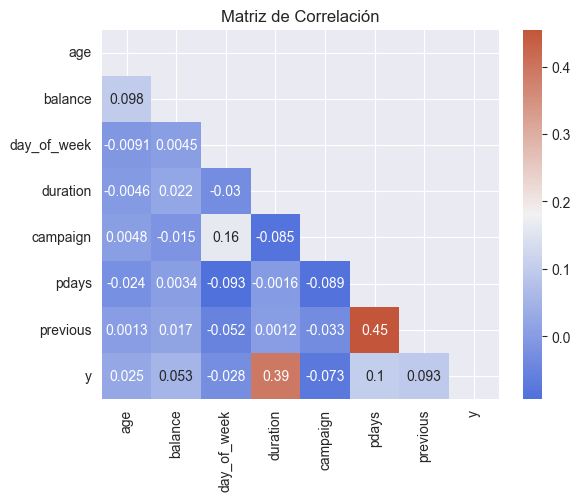

In [14]:
import numpy as np

corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(260, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.title("Matriz de Correlación")
plt.show()

Las características numéricas que tienen una mayor correlación con y son:


In [15]:
corr['y'].drop(index='y').sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'características'})

características         y
0        duration  0.394521
1           pdays  0.103621
2        previous  0.093236
3         balance  0.052838
4             age  0.025155

### Análisis de características 

#### Característica: `month` (categórica)

Realizaremos una observación mostrando la distribución total de la variable `month` y posteriormente observaremos su proporción en función del valor `yes` de la variable objetivo.

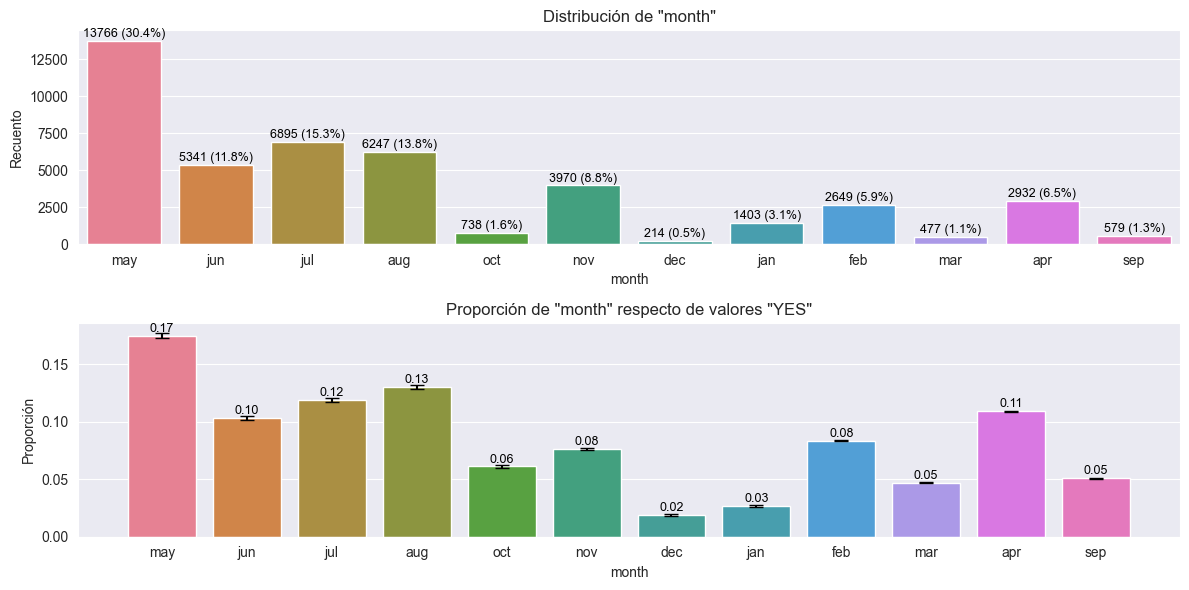

In [16]:
from utils import distribucion_proporcion_categorica

distribucion_proporcion_categorica(df, 'month', 'y')
plt.show()

La distribución no es regular y podemos observar que algunos meses son más propensos a la contratación del depósito.

Hubiera sido interesante contar con una variable que indicase el año, ya que dependiendo del contexto socioeconómico es posible que la contratación de depósitos pueda variar de un año a otro.

Podemos observar tambien, que durante el més de mayo el número de encuestas es mayor que en el resto de meses, pero no muchos de ellos contratan el depósito. Sin embargargo en los meses de agosto, julio, abril y junio la proporción de contratación es mayor habiendo menor número de encuentas realizas durante el mismo periodo.

Observemos el resto de características con respecto al último mes de contacto

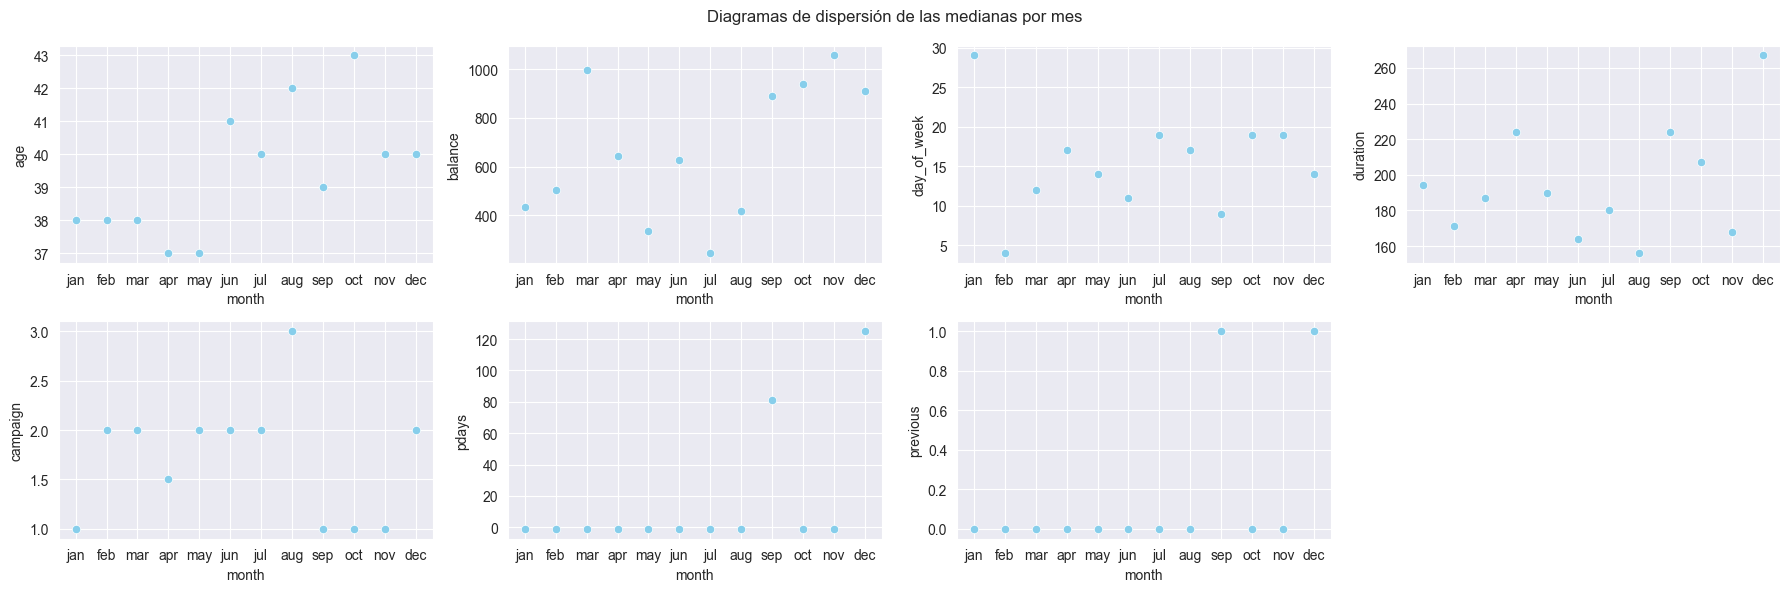

In [17]:
# Crear los scatter plots de manera correcta sin el problema del edgecolor
numerical_columns = df.select_dtypes(include='number').columns.tolist()
numerical_columns.remove('y')  # Excluir la variable objetivo 'y'
# Calcular la mediana de cada característica numérica por mes
median_values_by_month = df[numerical_columns+['month']].groupby('month').median()
ordered_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Reordenar los meses
median_values_by_month = median_values_by_month.reindex(ordered_months)

# Crear los scatter plots de las medianas por mes
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Crear los scatter plots con la mediana por mes
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.scatterplot(x=median_values_by_month.index, y=median_values_by_month[col], ax=ax, marker='o', color='skyblue')
    ax.set_xlabel('month')
    ax.set_ylabel(f'{col}')

# Eliminar subgráficos vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Diagramas de dispersión de las medianas por mes')
plt.tight_layout()
plt.show()


- Observamos que para `age`, `balance`, `day_of_week`, `duration` las medianas cambian de un mes a otro. 
- `campaign`, observamos periodos más o menos regulares de febrero a julio y de septiembre a noviembre.
- `pdays`, `previous` observamos que la mediana es 0 en la gran mayoría de meses salvo en septiembre y diciembre.

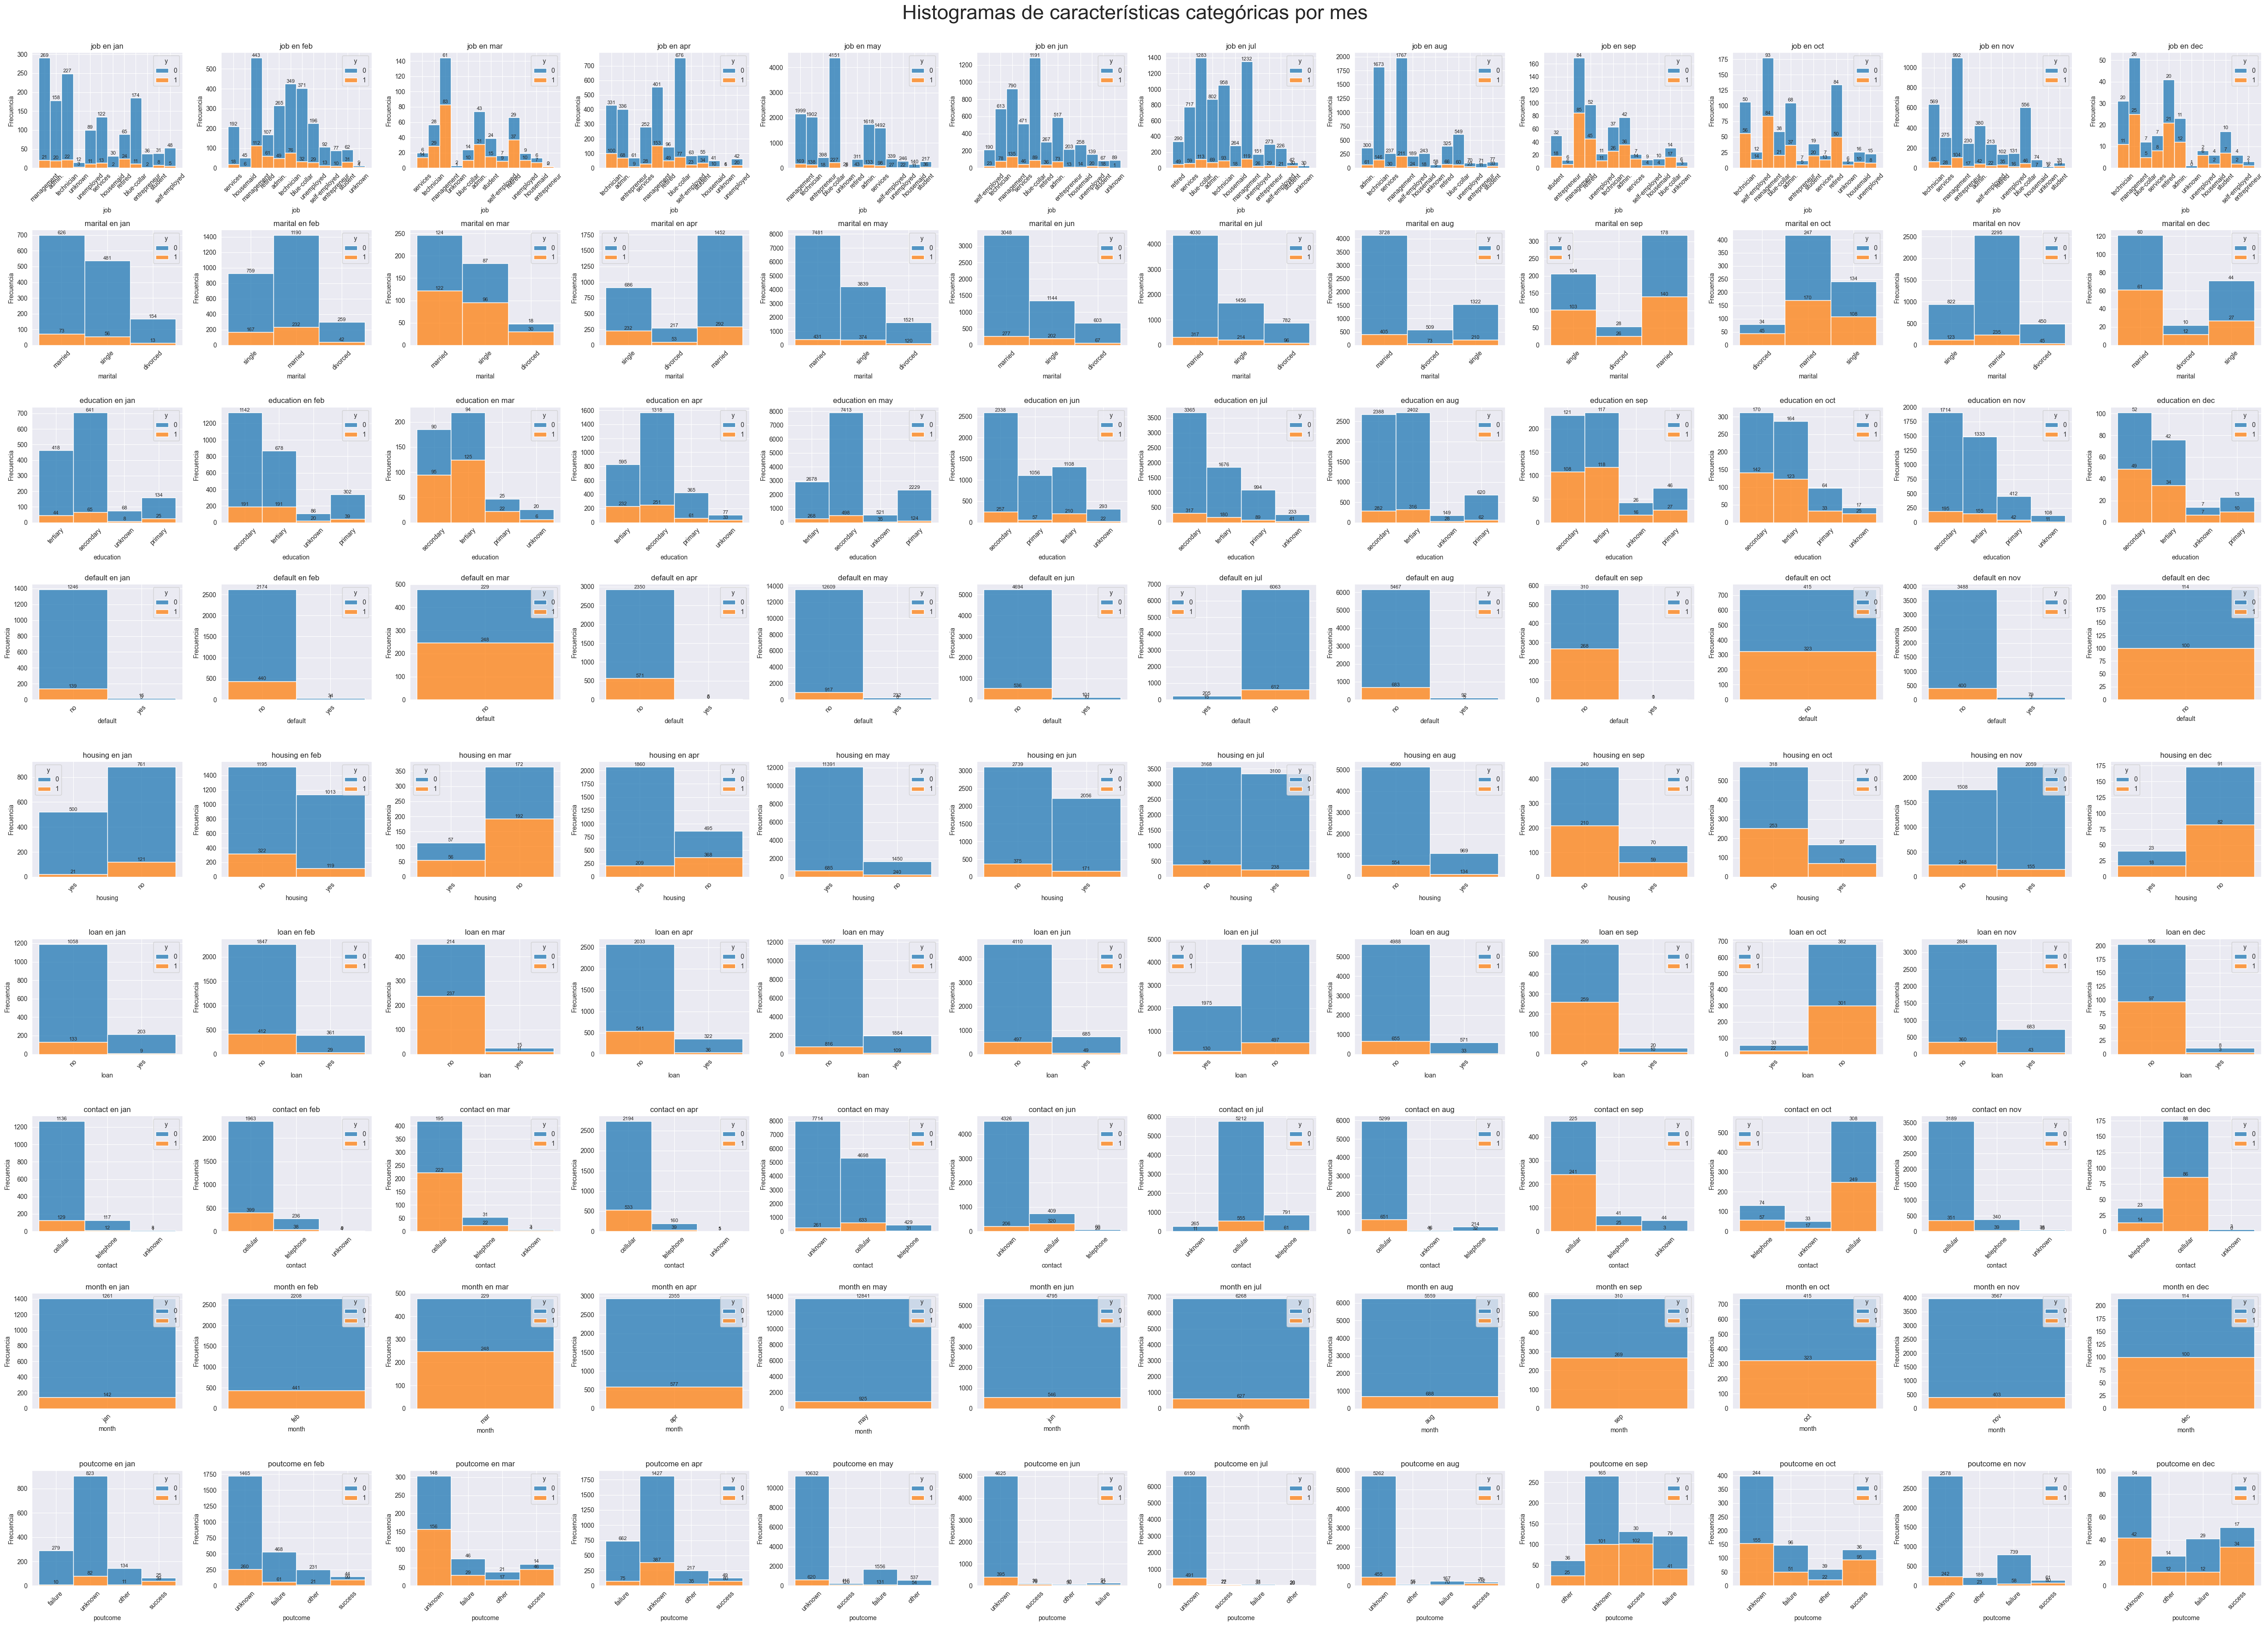

In [18]:
# Crear histplots de las características categóricas, cada uno en un subplot. Cada fila representa una característica y cada columna representa un mes.
categorical_columns = df.select_dtypes(include='object').columns.tolist()
# Crear un gráfico de subgráficos
fig, axes = plt.subplots(len(categorical_columns), len(ordered_months), figsize=(50, 35))

# Crear los histogramas para cada característica categórica
for i, col in enumerate(categorical_columns):
    for j, month in enumerate(ordered_months):
        # Filtrar los datos para el mes actual
        month_data = df[df['month'] == month]
        # Crear el histograma
        sns.histplot(month_data, x=col, ax=axes[i, j], bins=10, hue='y', multiple='stack')
        axes[i, j].set_title(f'{col} en {month}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Frecuencia')
        # Ajustar el formato del eje x
        axes[i, j].tick_params(axis='x', rotation=45)
        # Ajustar el formato del eje y
        axes[i, j].tick_params(axis='y', rotation=0)
        # Añadir etiquetas de conteo
        for p in axes[i, j].patches:
            h = p.get_height()
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + h + 0.5
            axes[i, j].annotate(f'{int(h)}', (x, y), ha='center', va='bottom', fontsize=8)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.suptitle('Histogramas de características categóricas por mes', fontsize=32, y=1.02)
plt.show()


- Aquellos con trabajo (`job`) de tipo `management`, son más propensos a contratar el depósito.
- No hay una nada significativa en la variable `marital`.
- En la variable `education`, observamos que aquellos con educación secundaria son los que más contratan el depósito.
- En la variable `default`, observamos meses en los que los encuestados no tienen crédito en mora.
- Aquellos que no tienen un préstamo para vivienda (`housing`) o personal (`loan`) son más propensos a contratar el depósito.
- Aquellos que son contactados (`contact`) por celular (`cellular`) son más propensos a contratar el depósito.
- Por norma general, aquellos que contratron un producto en la campaña anterior (`poutcome`) lo han vuelto a contratar en la campaña actual.

**Conclusiones de la característica `month`**

La variable `month` tiene una distribución irregular y algunos meses son más propensos a la contratación del depósito. Considero que la variable `month` no es relevante para la elaboración del modelo predictivo, porque no parece ser determinante a la hora de contratar el depósito. Sin embargo, es importante tener en cuenta que la contratación de depósitos puede variar dependiendo del contexto socioeconómico y de la situación financiera de los clientes. Por lo tanto, es recomendable realizar un análisis más profundo con mayor información para determinar si esta variable tiene un impacto significativo en la decisión de contratación.

#### Característica: `age` (numérica)

Analicemos la distribución de la variable `age` y la proporción de personas que han contratado el depósito. Tendremos que hacer uso del objeto `KBinsDiscretizer` de `sklearn` para poder discretizar la variable `age` y observar su distribución.

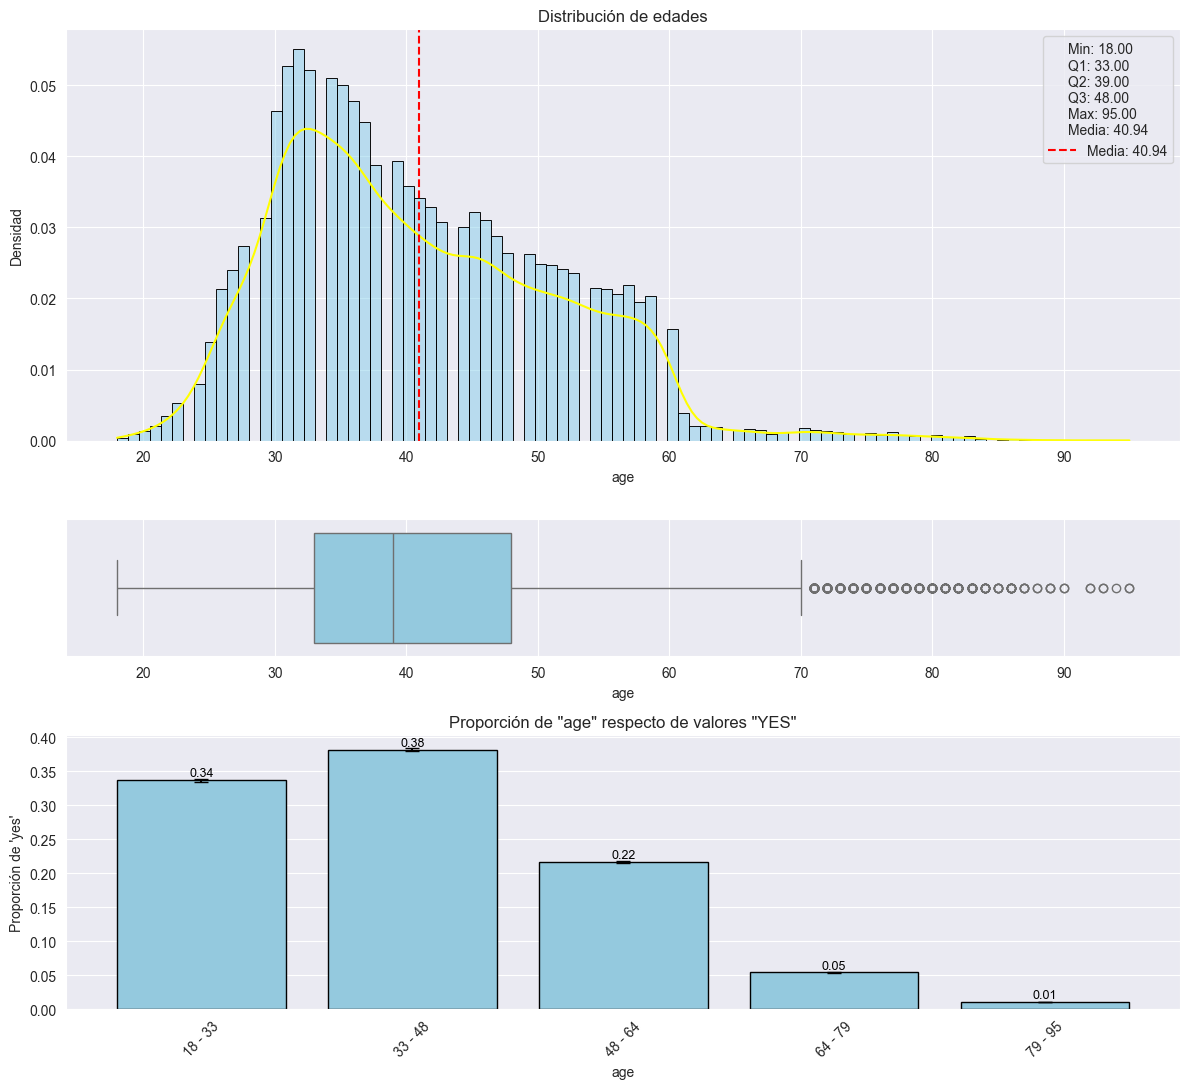

In [19]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df, 'age', (12, 5), 'y')
plt.show()

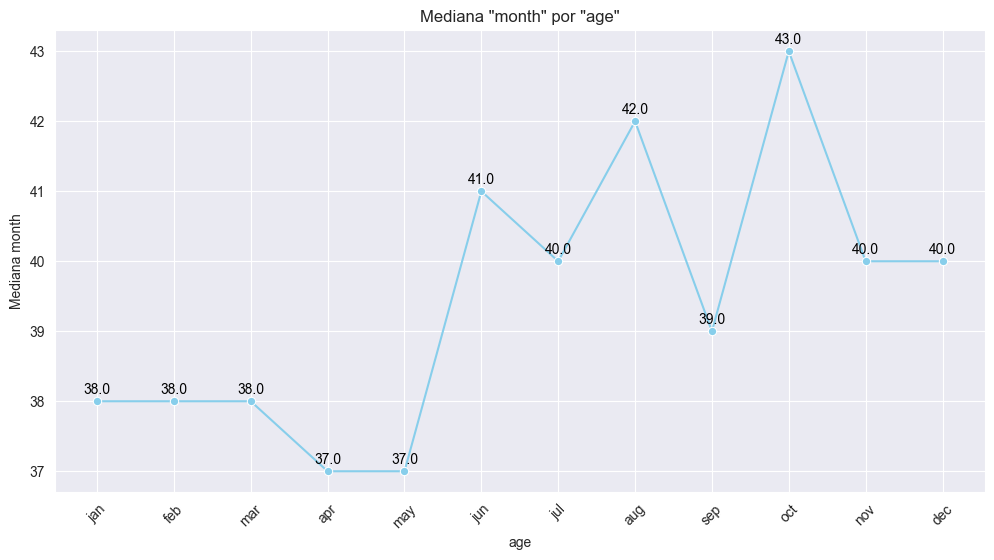

In [20]:
from utils import mediana_por_mes

fig = mediana_por_mes(df, 'age')
plt.show()

In [21]:
print(f"Correlación entre edad y variable objetivo: {df['age'].corr(df['y']):.4f}")

Correlación entre edad y variable objetivo: 0.0252


**Observaciones de `age`:**
- La mayoría de los encuestados tienen entre 30 y 60 años.
- La media de edad es de 41 años.
- La mediana de edad es de 39 años.
- Aquellos que contratan el depósito suelen ser más jóvenes que aquellos que no lo contratan.
- No existe una correlación significativa entre la edad y la contratación del depósito.

#### Característica: `job` (categórica)

Analicemos la distribución de la variable `job` y la proporción de personas que han contratado el depósito.

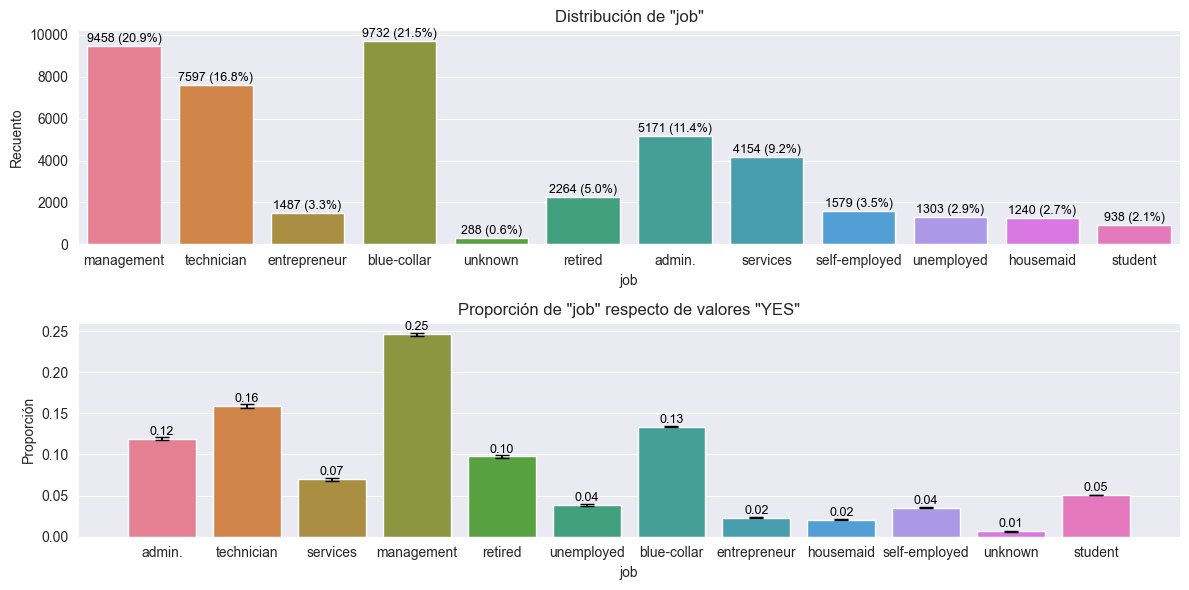

In [22]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'job', 'y')
plt.show()

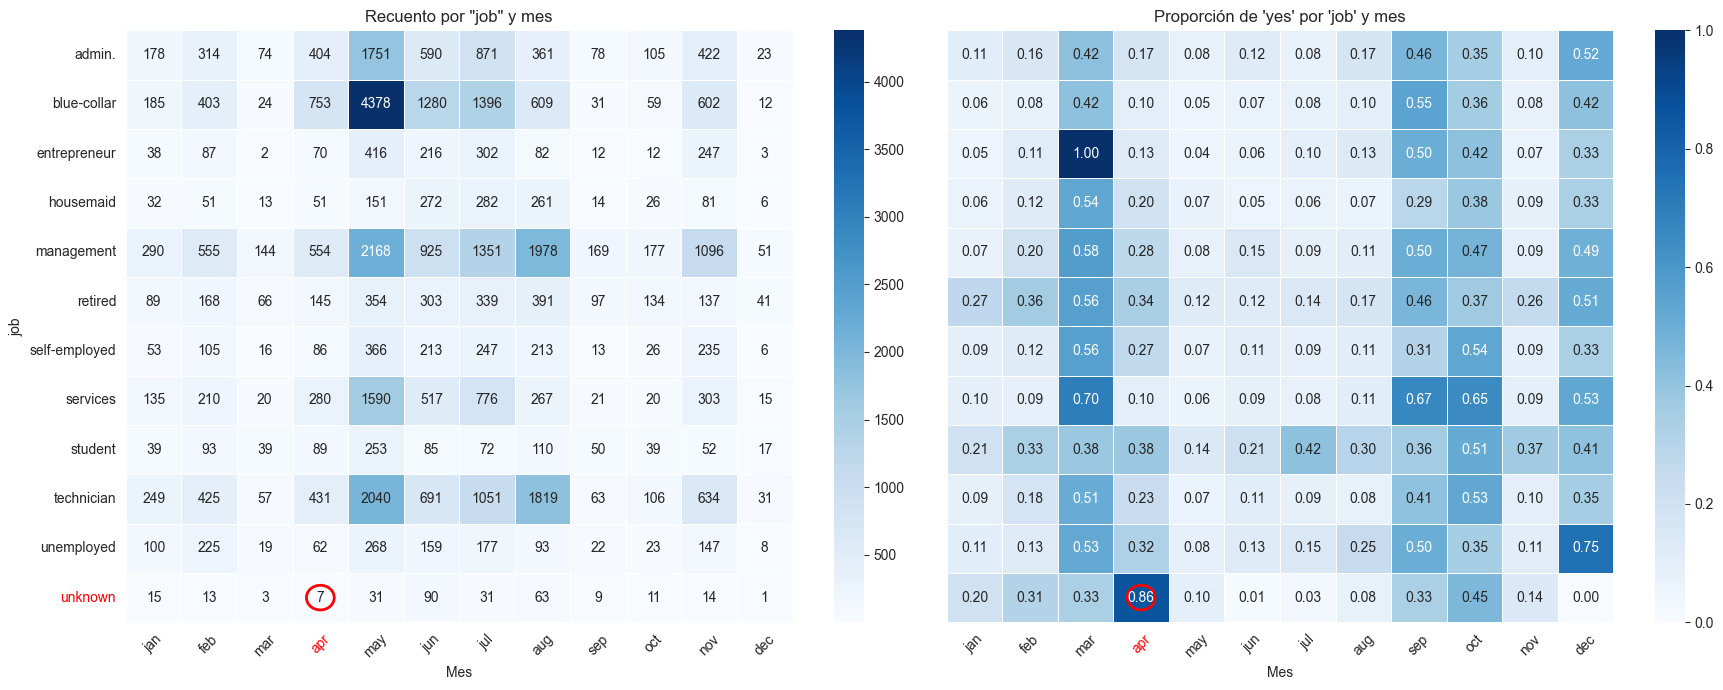

In [23]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'job', 'y', highlight=('unknown', 'apr'))
plt.show()

**Observaciones de `job`:**
- Las personas con trabajos de tipo `management`, `blue-collar` y `technician` han sido las más encuestadas
- Aquellos que tienen un trabajo de tipo `management` son los que más contratan el depósito.
- Podemos observar que aquellos con trabajo de tipo `services` han contratado el depósito principalmente en marzo, septiembre, octubre y diciembre.
- Un 58,9% de los encuestados pertenecen a la clase obrera (`technician`, `blue-collar`, `services` y `admin`)
- En términos generales, marzo, septiembre, octubre y diciembre son los meses en los que más se contratan depósitos.
- Quizá el hecho de tener un trabajo de tipo `management` pueda tener cierto impacto en la contratación del depósito, pero no es determinante.

#### Característica: `marital` (categórica)

Analicemos la distribución de la variable `marital` y la proporción de personas que han contratado el depósito.

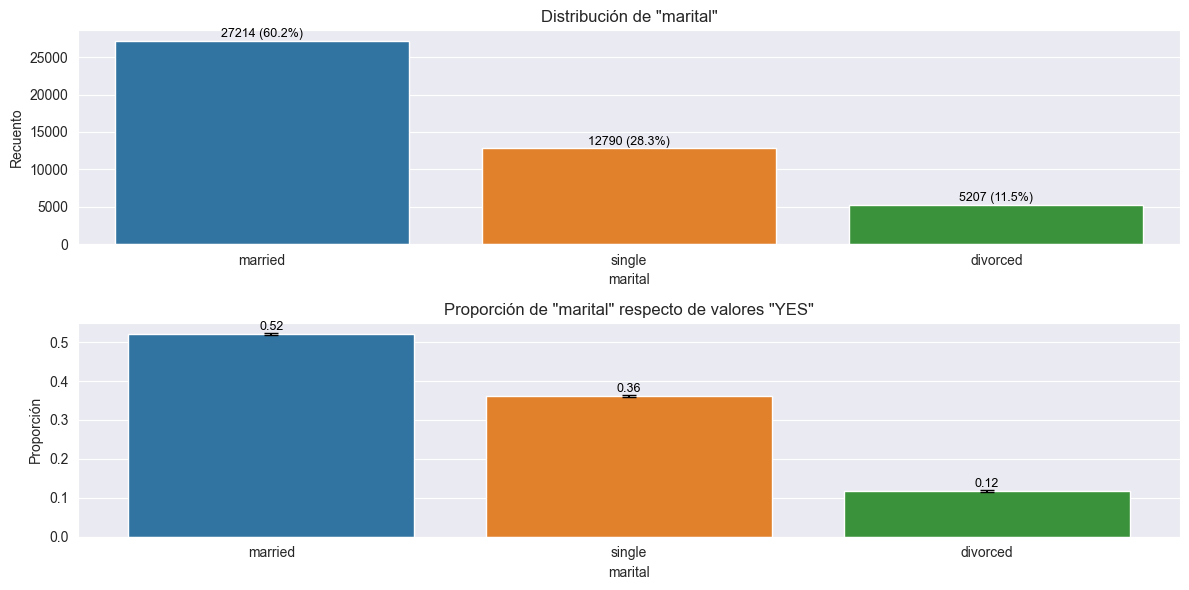

In [24]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'marital', 'y')
plt.show()

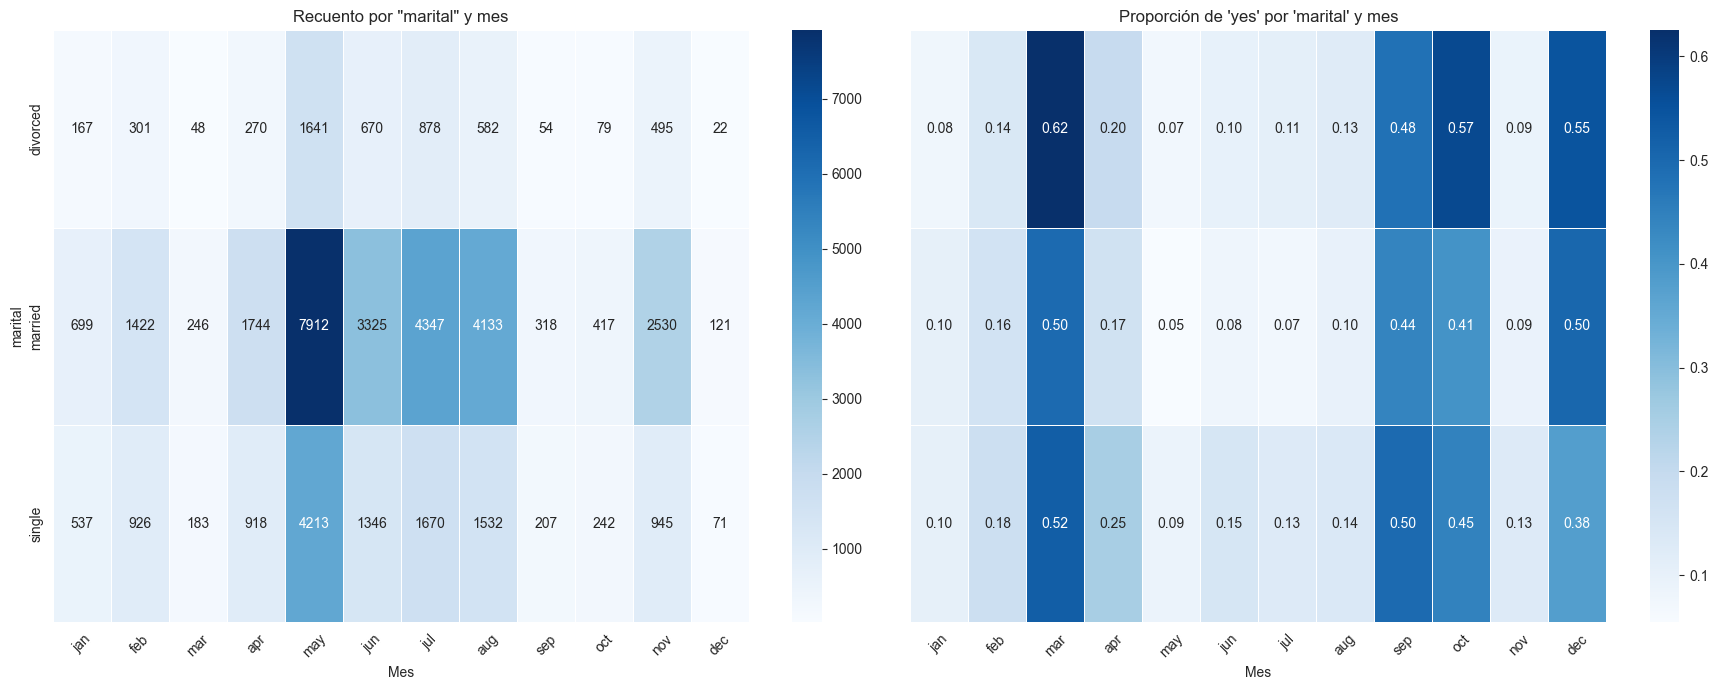

In [25]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'marital', 'y')
plt.show()

**Observaciones de `maritial`:**
- Aquellos que están casado (`married`) contratan más el depósito, aunque tambien han sido los más encuestados.
- Los solteros (`single`) cuentan con una proporción de contratación de 0.38
- Seguimos observando que la proporción de contratación es más elevada en los meses de marzo, septiembre, octubre y diciembre.
- No se observa una correlación significativa entre el estado civil y la contratación del depósito.

#### Característica: `education` (categórica)

Analicemos la distribución de la variable `education` y la proporción de personas que han contratado el depósito.

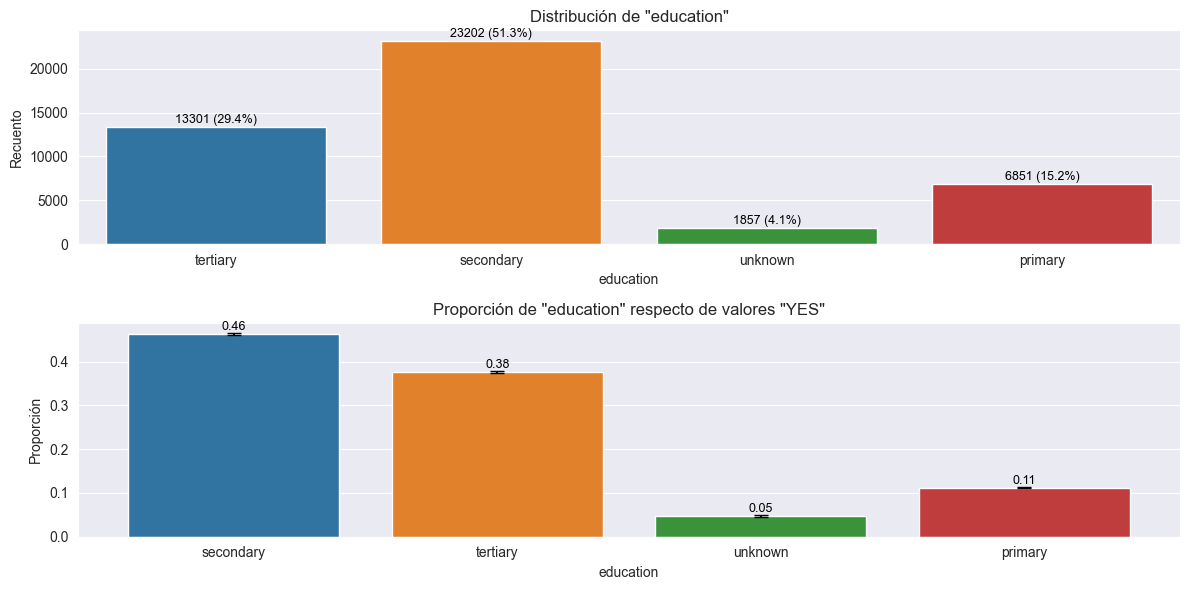

In [26]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'education', 'y')
plt.show()

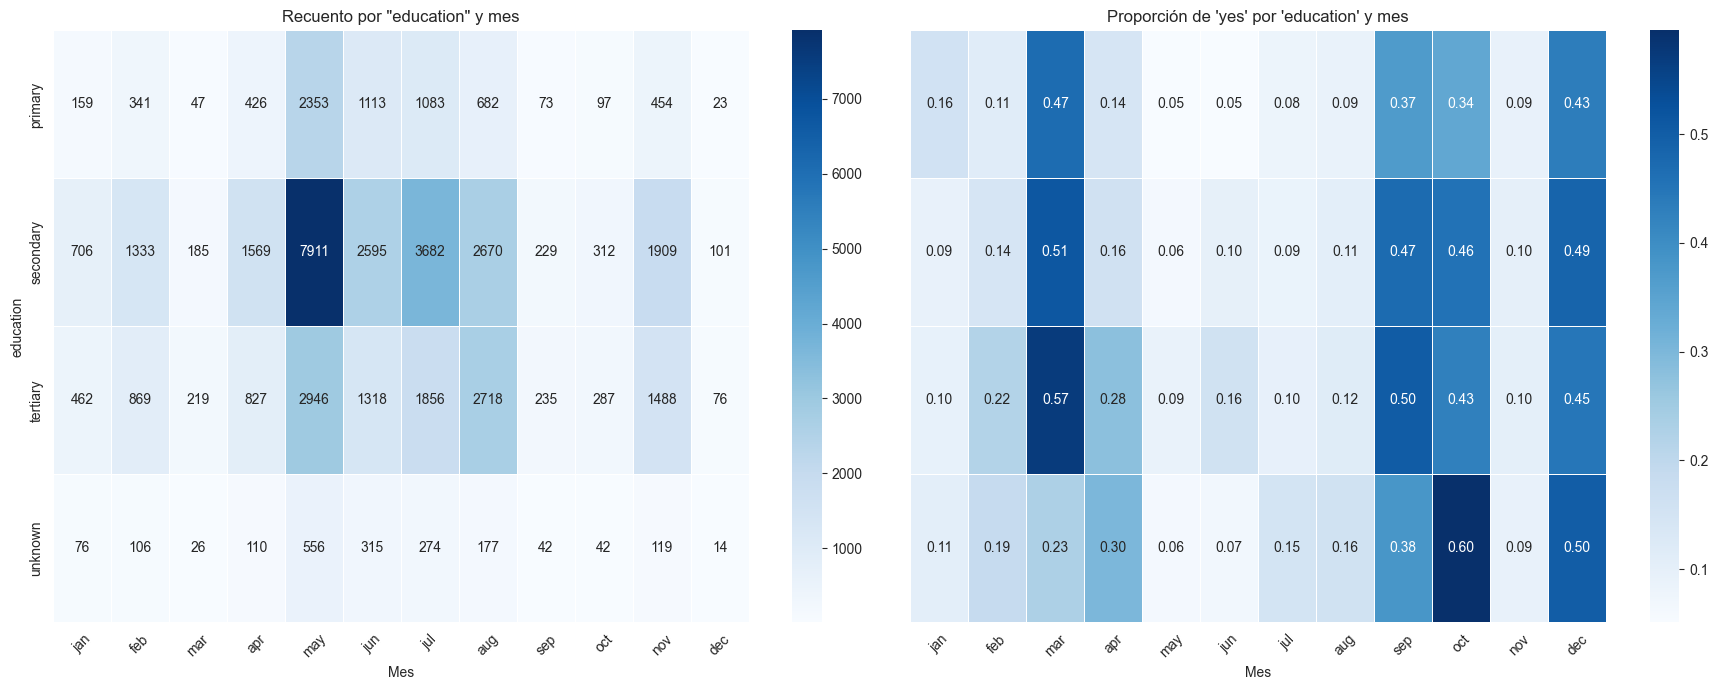

In [27]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'education', 'y')
plt.show()

**Observaciones de `education`:**
- La gran mayoría de encuestados tienen estudios secundarios (`secondary`)
- Aquellos con estudios `secondary` y `tertiary` son los que más contratan el depósito
- Seguimos observando que la proporción de contratación es más elevada en los meses de marzo, septiembre, octubre y diciembre.
- No se observa una correlación significativa entre el nivel de estudios y la contratación del depósito.

#### Característica: `default` (categórica)

Analicemos la distribución de la variable `default` y la proporción de personas que han contratado el depósito.

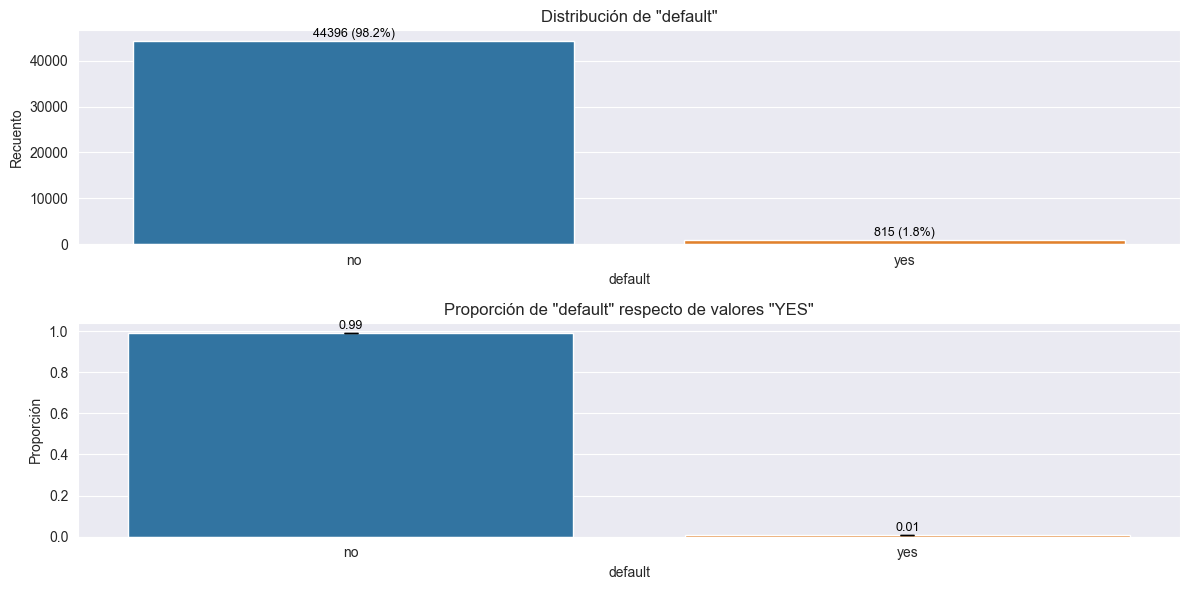

In [28]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'default', 'y')
plt.show()

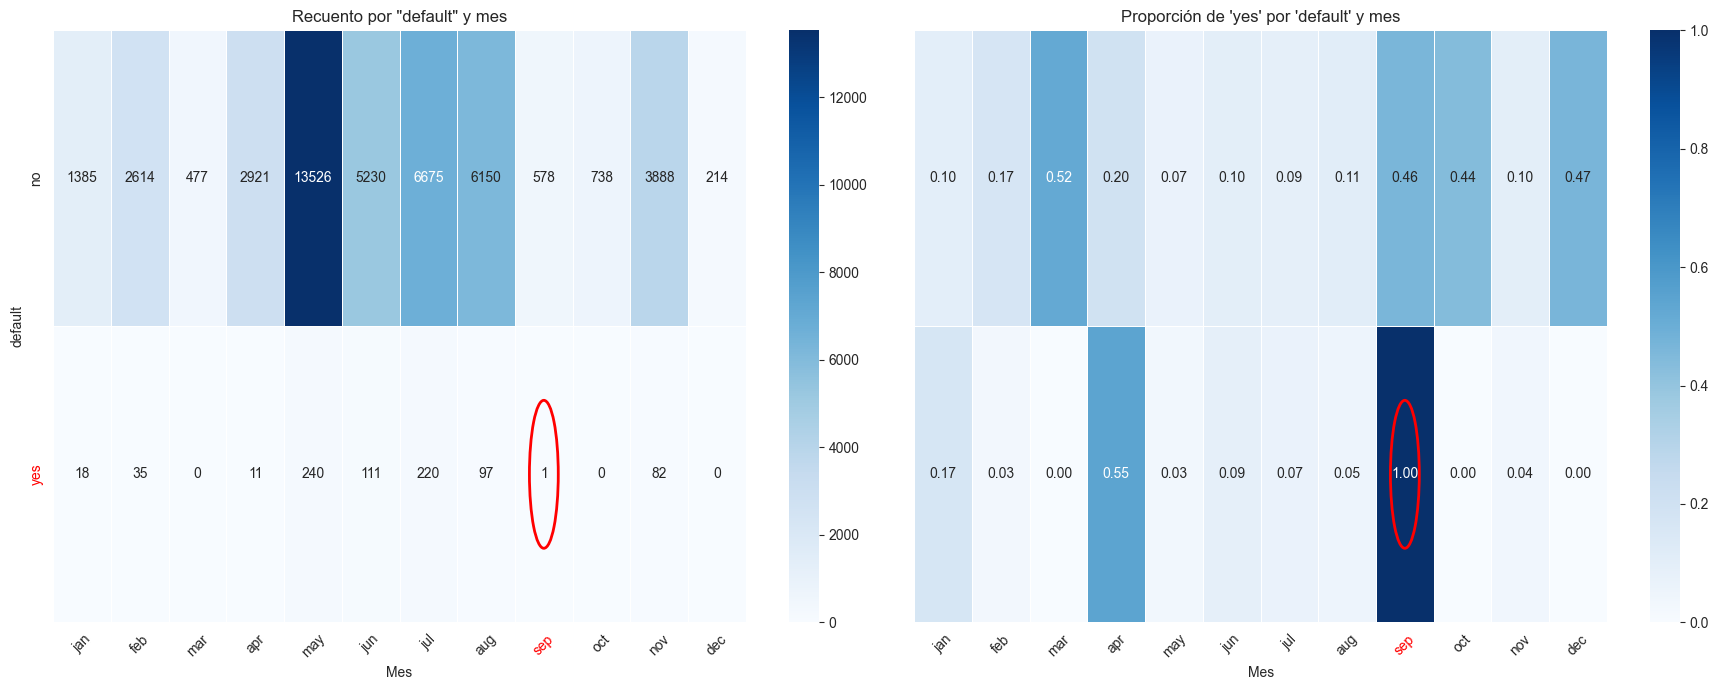

In [29]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'default', 'y', highlight=('yes', 'sep'))
plt.show()

**Observaciones de `default`:**
- Aquellos que no tienen crédito en mora (`no`) son los que contratan el depósito.
- En septiembre hemos detectado 1 encuesta con un crédito en mora, y ha contratado el depósito. Esto puede ser puede significar una anomalía en el dataset.
- El hecho de no tener un crédito en mora es un factor determinante a la hora de contratar el depósito.
- Podríamos considerar la variable `default` como booleana, ya que solamente tenemos dos valores posibles: `yes` o `no`.

#### Característica: `housing` (categórica)

Analicemos la distribución de la variable `housing` y la proporción de personas que han contratado el depósito.

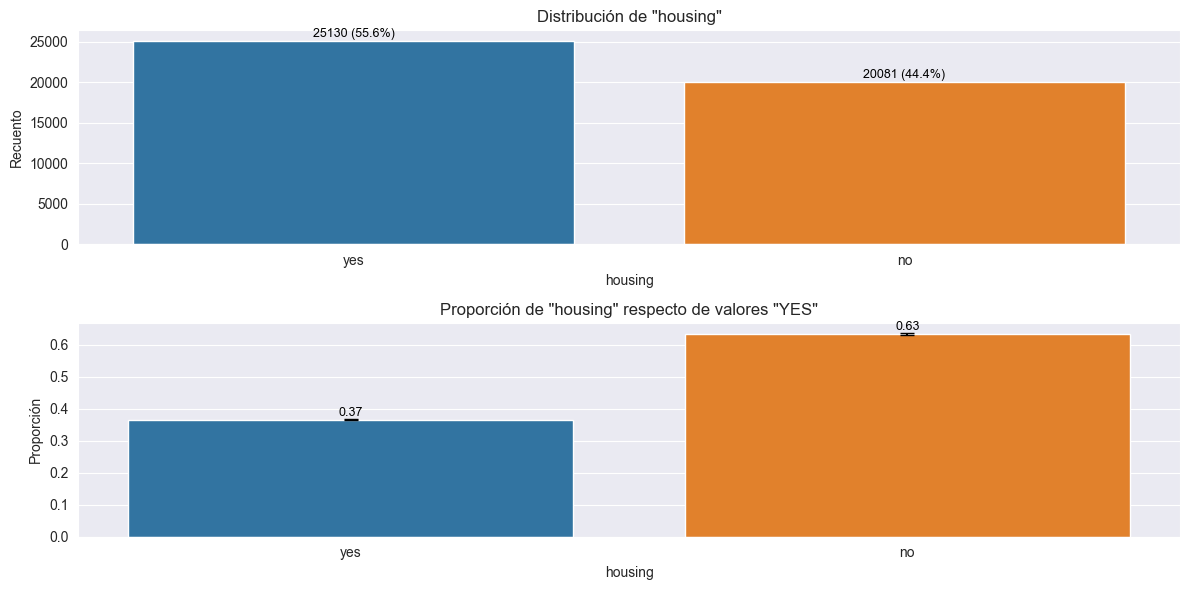

In [30]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'housing', 'y')
plt.show()

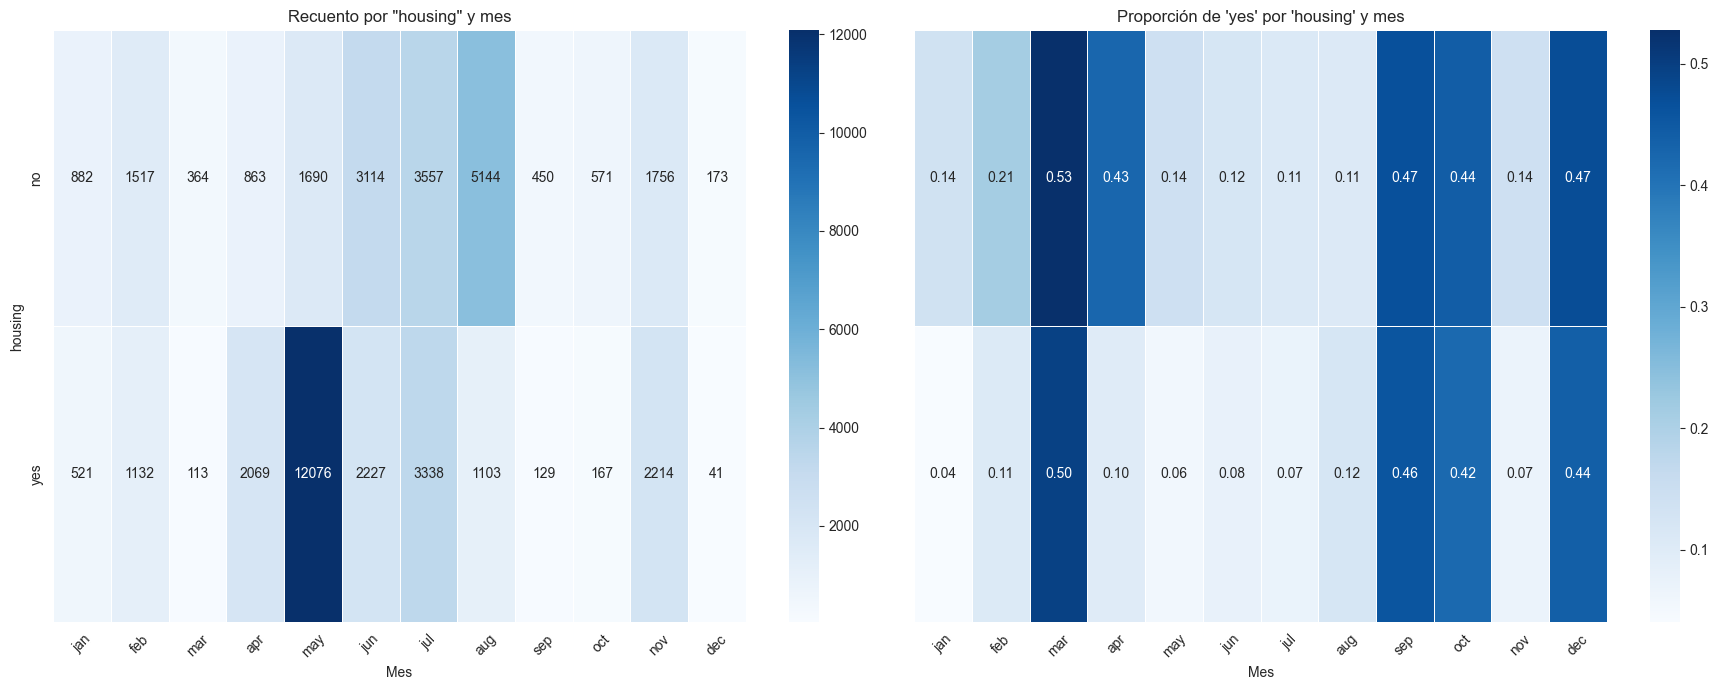

In [31]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'housing', 'y')
plt.show()

**Observaciones de `housing`:**
- La distribución de la variable `housing` es relativamente regular.
- Aquellos que no tienen un prestamo para vivienda (`no`) son los que más contratan el depósito.
- El hecho de tener un préstamo para vivienda es un factor que puede afectar a la hora de contratar el depósito, pero no es determinante.
- Podríamos considerar la variable `housing` como booleana, ya que solamente tenemos dos valores posibles: `yes` o `no`.

#### Característica: `loan` (categórica)

Analicemos la distribución de la variable `loan` y la proporción de personas que han contratado el depósito.

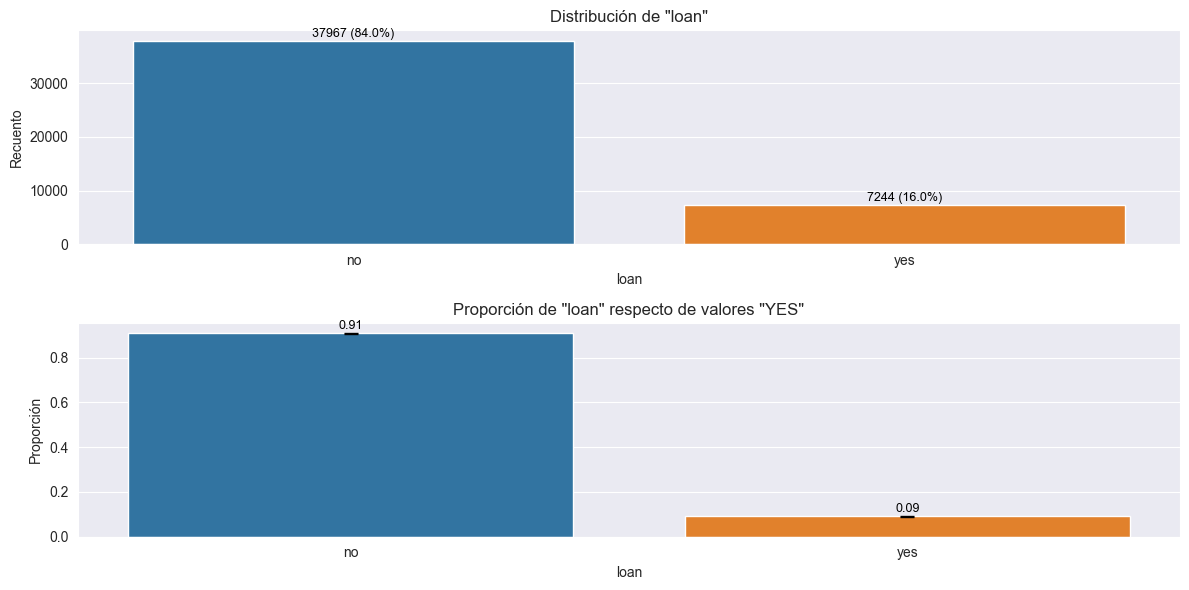

In [32]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'loan', 'y')
plt.show()

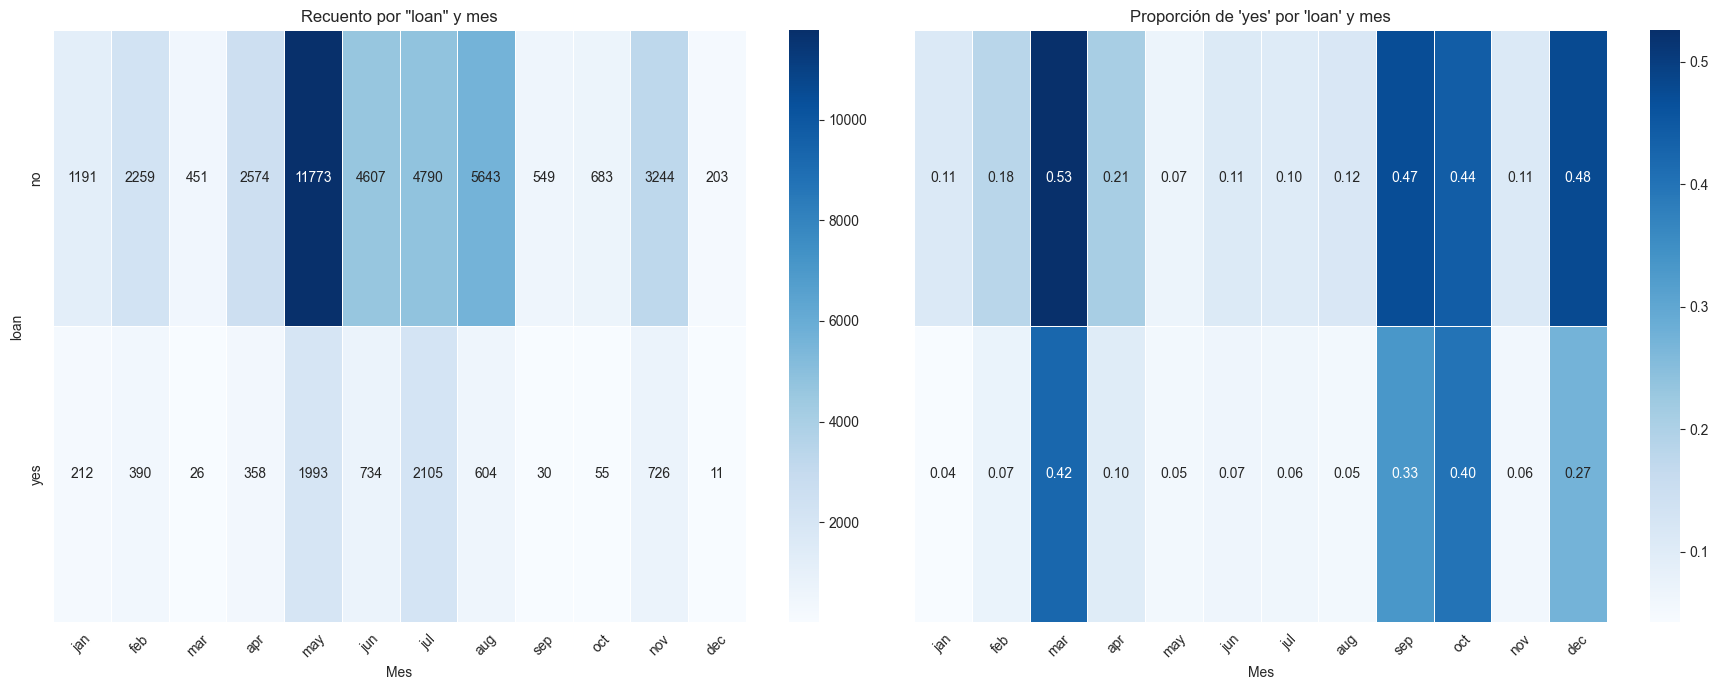

In [33]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'loan', 'y')
plt.show()

**Observaciones de `loan`:**
- La gran mayoría de encuestados no tienen un préstamo personal (`no`) y contrataron el depósito.
- Tener un préstamo personal es un factor que puede afectar a la hora de contratar el depósito.

#### Característica: `contact` (categórica)

Analicemos la distribución de la variable `contact` y la proporción de personas que han contratado el depósito.

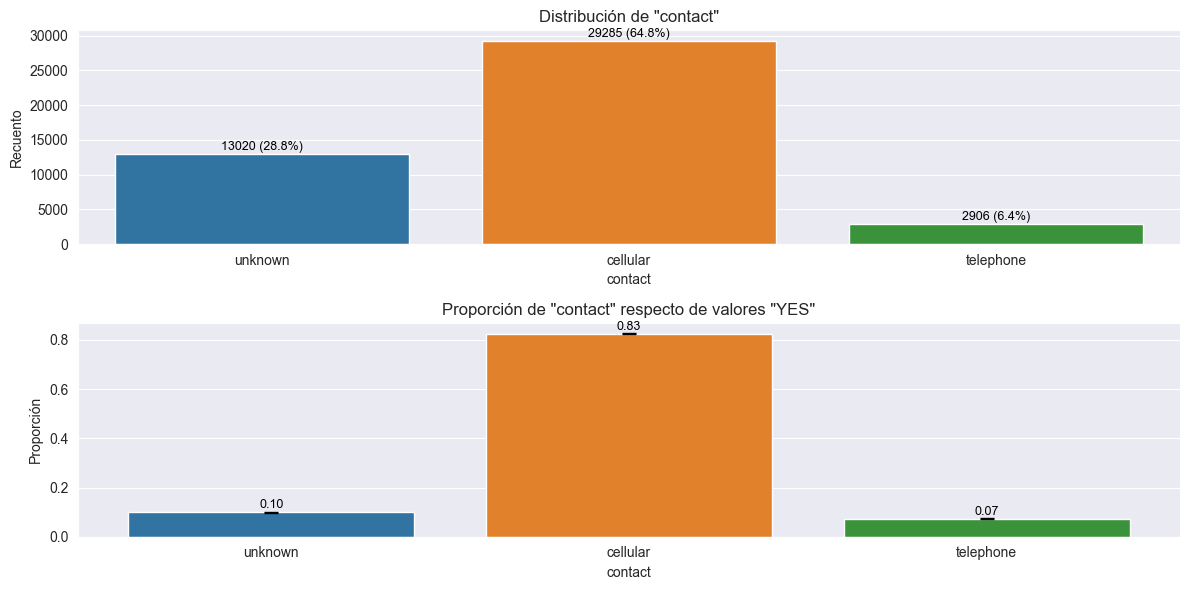

In [34]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'contact', 'y')
plt.show()

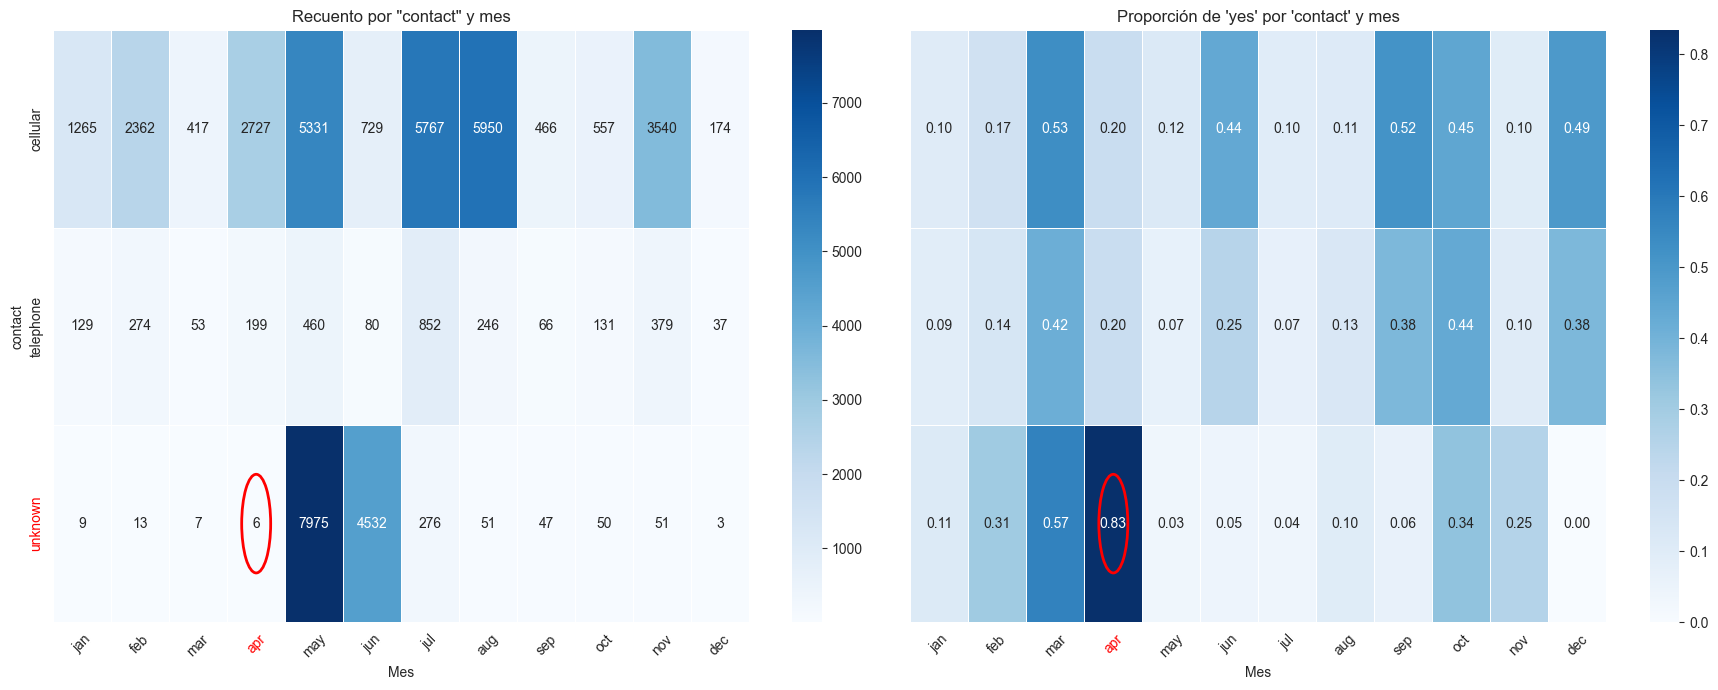

In [35]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'contact', 'y', highlight=('unknown', 'apr'))
plt.show()

In [36]:
print(f"Porcentaje otros medios: {0.1 * 13020 / df.shape[0] * 100:.2f}%")

Porcentaje otros medios: 2.88%


**Observaciones de `contact`:**
- Observamos que hay que un 2,88% de los encuestados fueron contactos por otros medios y que contrataron el servicio.
- La gran mayoría de los contactos fueron realizados por teléfono móvil (`cellular`) y la tasa de contratación del depósito es muy elevada.
- Observamos una posible anomália en el mes de abril ya que el numero de encuestados para unknown fueron pocos pero la proporción de contratación fue muy alta.
- El hecho de ser contactado por teléfono móvil puede influir en la contratación del depósito, vemos una alta proporción de contratación.

#### Característica: `day_of_week` (numérica)

Analicemos la distribución de la variable `day_of_week` y la proporción de personas que han contratado el depósito. Tendremos que hacer uso del objeto `KBinsDiscretizer` de `sklearn` para poder discretizar la variable `day_of_week` y observar su distribución.

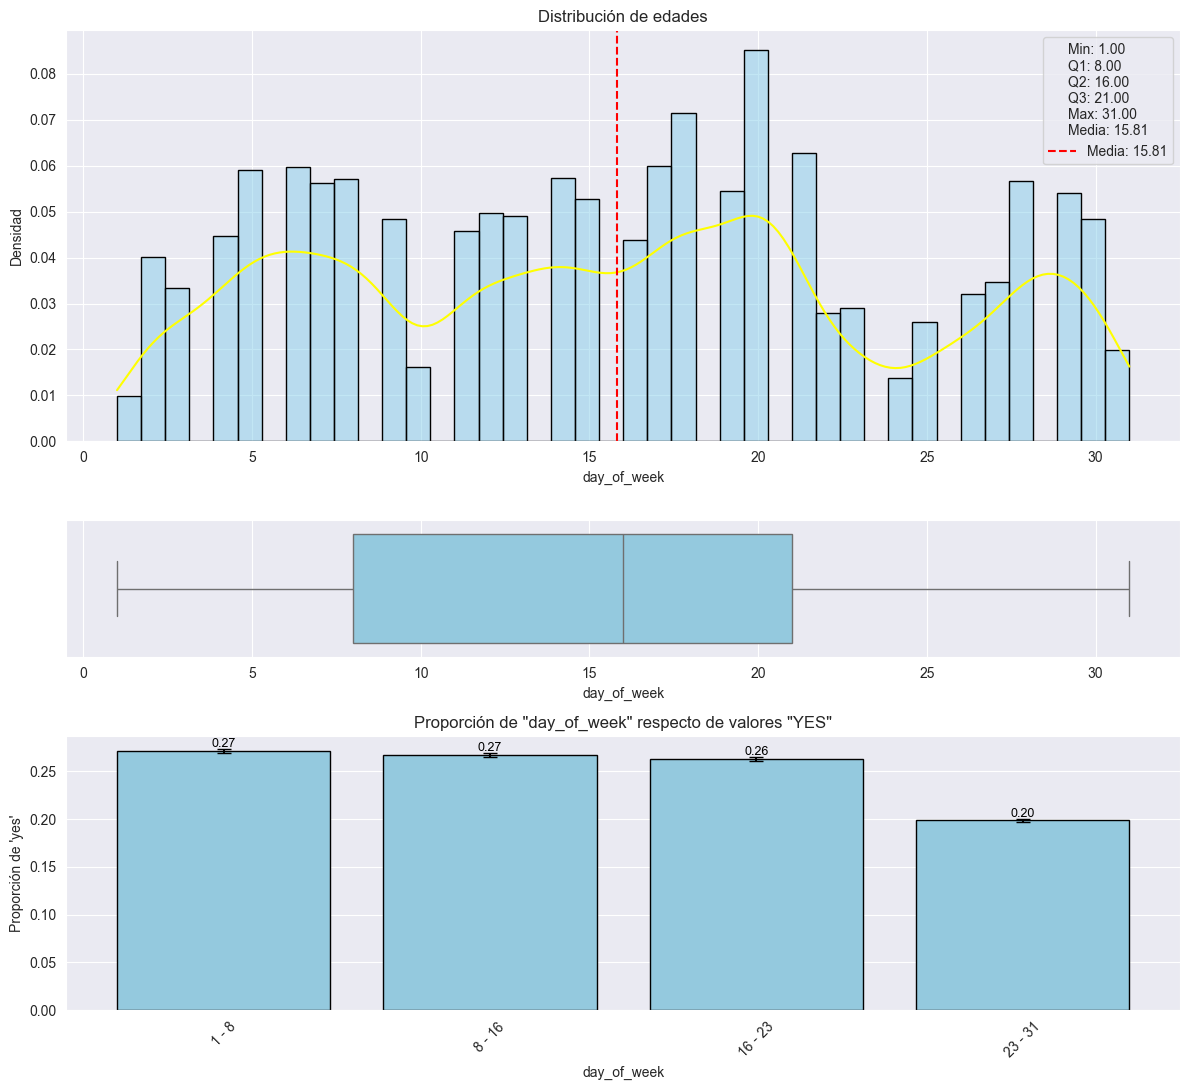

In [37]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df, 'day_of_week', (4, 4), 'y')
plt.show()

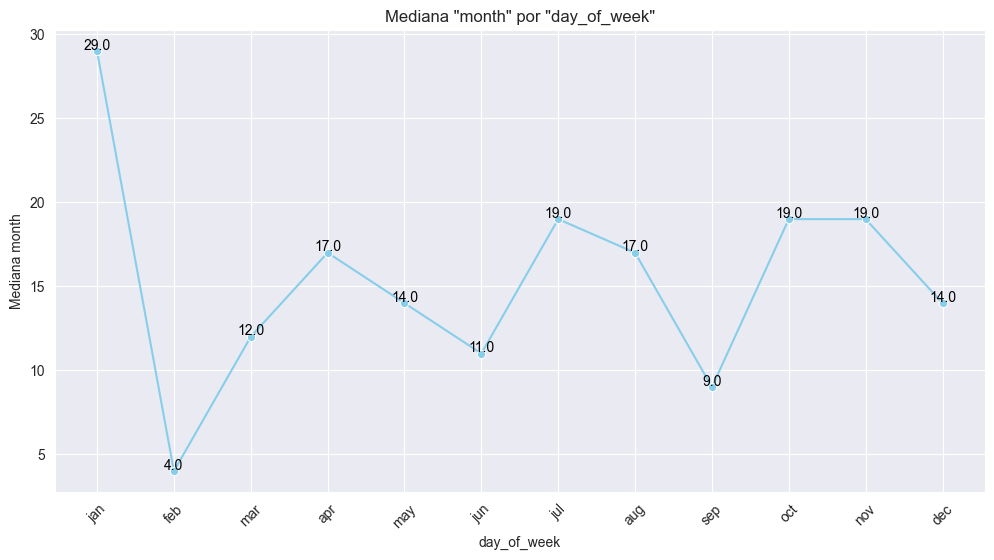

In [38]:
from utils import mediana_por_mes

fig = mediana_por_mes(df, 'day_of_week')
plt.show()

In [39]:
print(f"Correlación entre dia de la semana y variable objetivo: {df['day_of_week'].corr(df['y']):.4f}")

Correlación entre dia de la semana y variable objetivo: -0.0283


**Observaciones de `day_of_week`:**
- Observamos una distribución y proporción regular para la variable `day_of_week`
- La variable `day_of_week` no parece tener un impacto significativo en la contratación del depósito.
- Podríamos extraer mucho más conocimiento de esta variable si disponemos del año, ya que podríamos comprobar si obtenemos mejores resultados en días festivos o fines de semana o en día laborales.

#### Característica: `duration` (numérica)

Analicemos la distribución de la variable `duration` y la proporción de personas que han contratado el depósito. Tendremos que hacer uso del objeto `KBinsDiscretizer` de `sklearn` para poder discretizar la variable `duration` y observar su distribución.

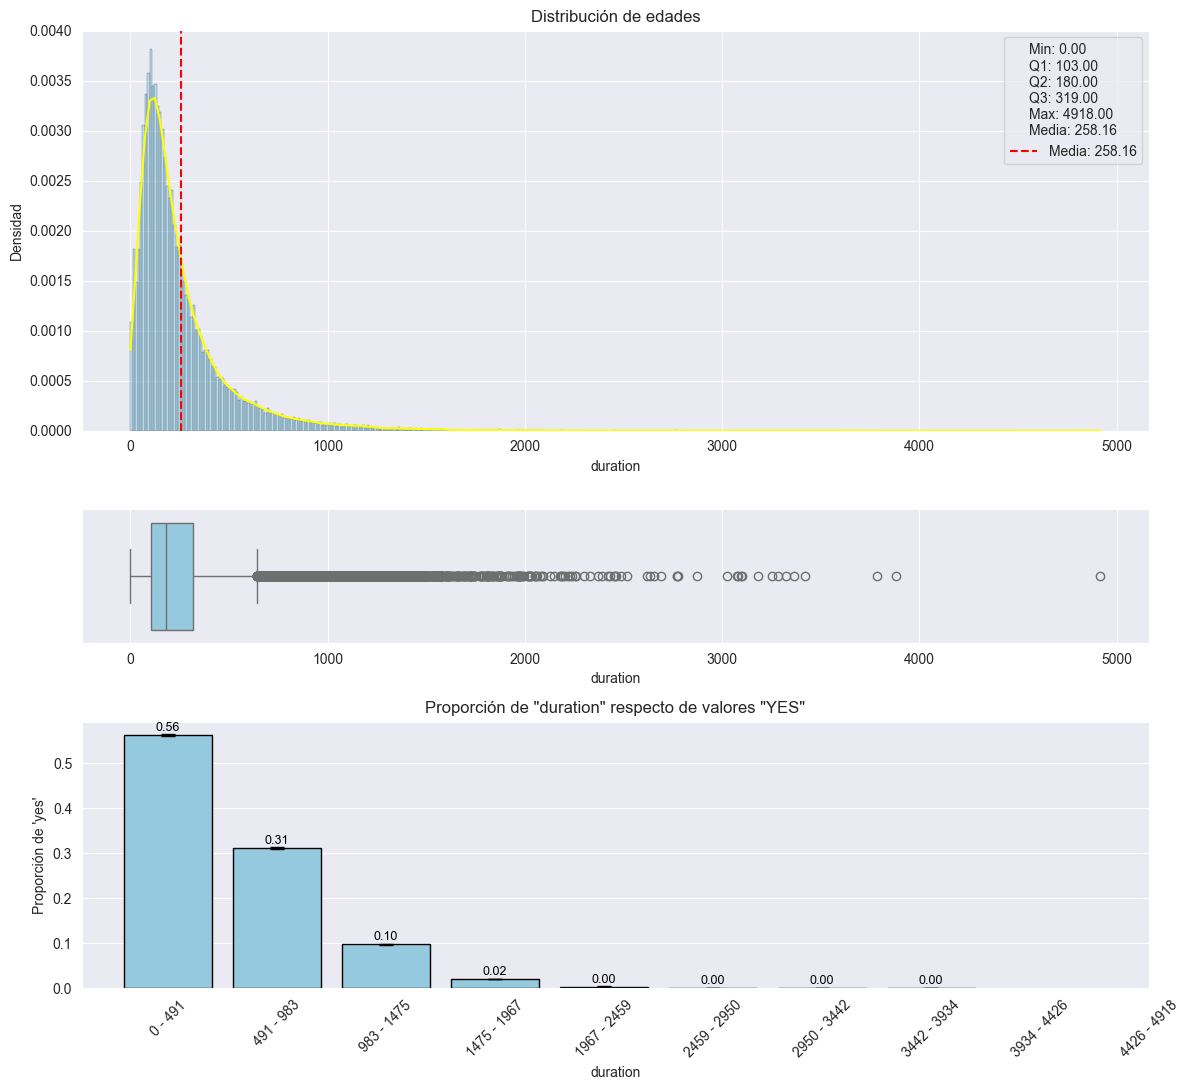

In [40]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df, 'duration', (20, 10), 'y')
plt.show()

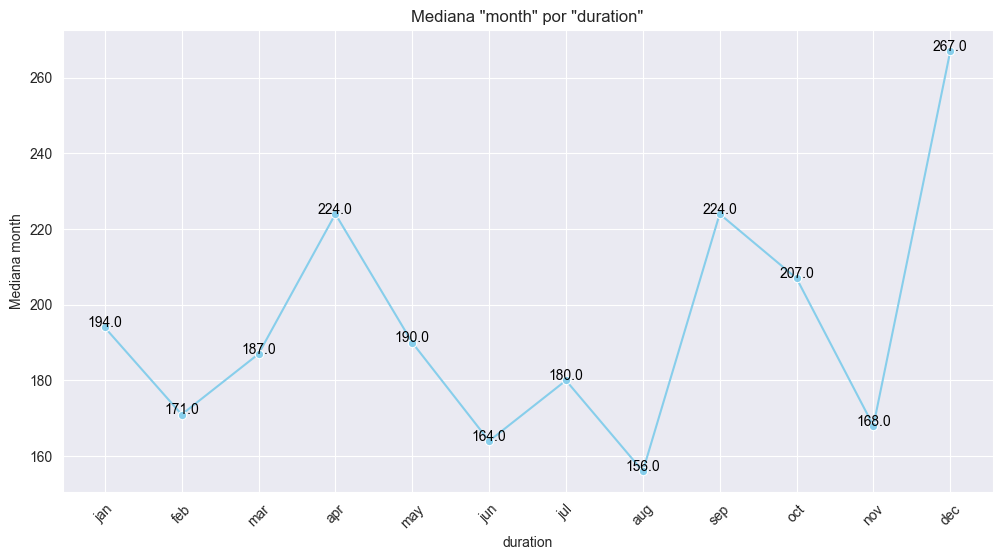

In [41]:
from utils import mediana_por_mes

fig = mediana_por_mes(df, 'duration')
plt.show()

In [42]:
print(f"Correlación entre duracion y variable objetivo: {df['duration'].corr(df['y']):.4f}")

Correlación entre duracion y variable objetivo: 0.3945


**Observaciones de `duration`:**
- Si consideramos que la duración de la llamada se encuentra en los 2 primeros bloques, podríamos asumir que hay más probabilidades de que la persona contrate el depósito.
- Detectamos un gran numero de outliers
- Si la llamada se excede más de los 2 primeros bloques la probabilidad de que la persona contrate el depósito disminuye drásticamente.
- Recordemos que este atributo tiene un impacto muy significativo en la variable objetivo, por lo que si `duration` es 0, `y` será `no`. 

#### Característica: `campaign` (numérica)

Analicemos la distribución de la variable `campaign` y la proporción de personas que han contratado el depósito. Tendremos que hacer uso del objeto `KBinsDiscretizer` de `sklearn` para poder discretizar la variable `campaign` y observar su distribución.

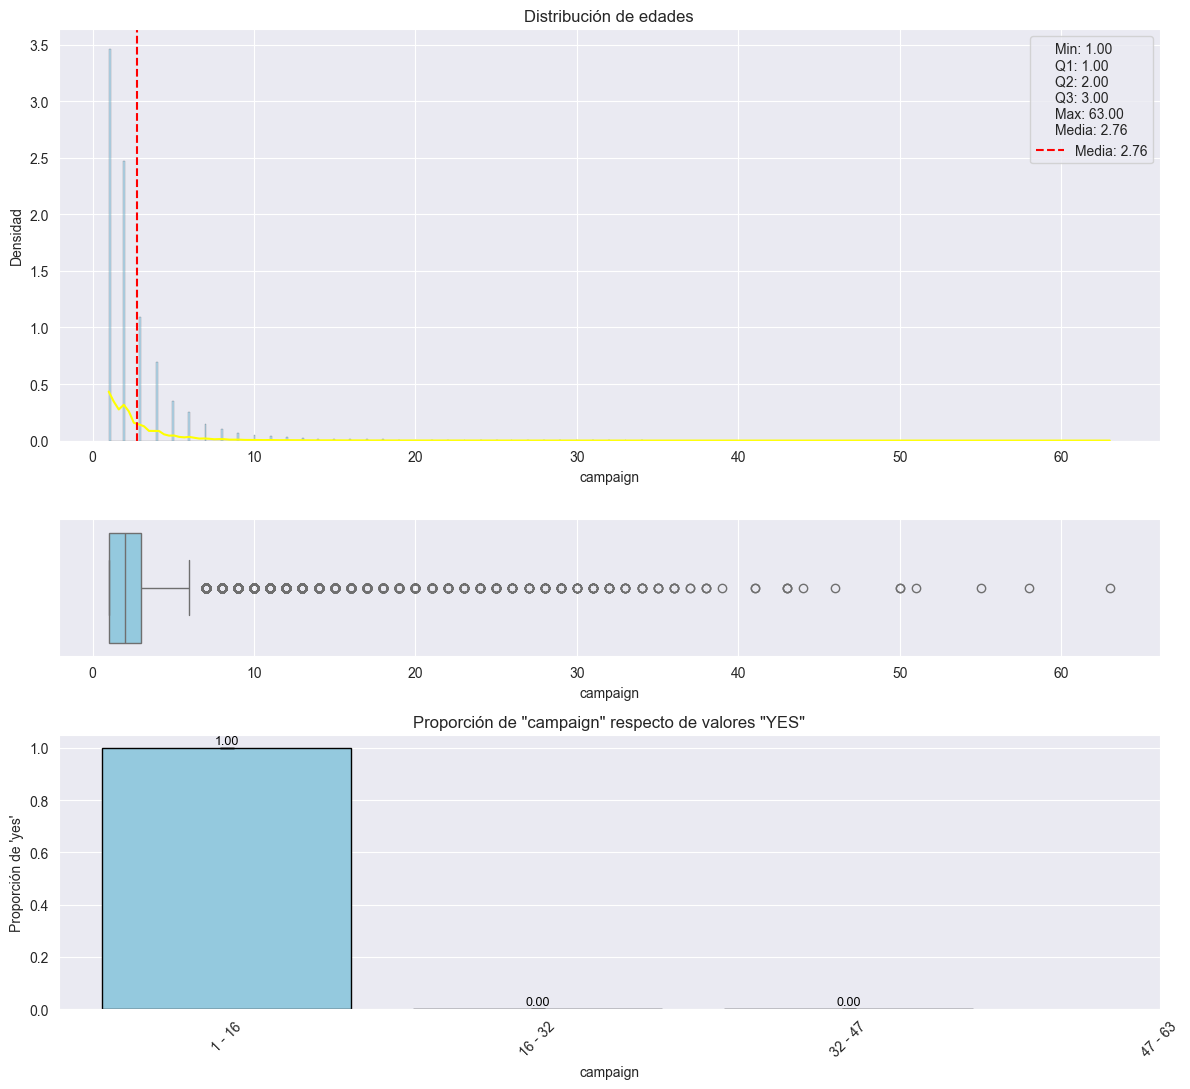

In [43]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df, 'campaign', (10, 4), 'y')
plt.show()

Observamos que practicamente la proporción de contratación se concentra en el primer grupo de la campaña (1-16). Analicemos con más detalle este grupo

In [44]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

campaign_group_1 = df[df['campaign'] <= 16].reset_index(drop=True)
campaign_group_1.campaign.value_counts()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
Name: count, dtype: int64

In [45]:
print(f"Correlación entre duracion y variable objetivo: {df['campaign'].corr(df['y']):.4f}")

Correlación entre duracion y variable objetivo: -0.0732


**Observaciones de `campaign`:**
- Observamos que el número de contactos realizados durante la campaña por cada cliente suele ser 1 o 2.
- A mayor número de contactos, menor es la proporción de contratación del depósito.

#### Característica: `pdays` (numérica)

Analicemos la distribución de la variable `pdays` y la proporción de personas que han contratado el depósito. Tendremos que hacer uso del objeto `KBinsDiscretizer` de `sklearn` para poder discretizar la variable `pdays` y observar su distribución.

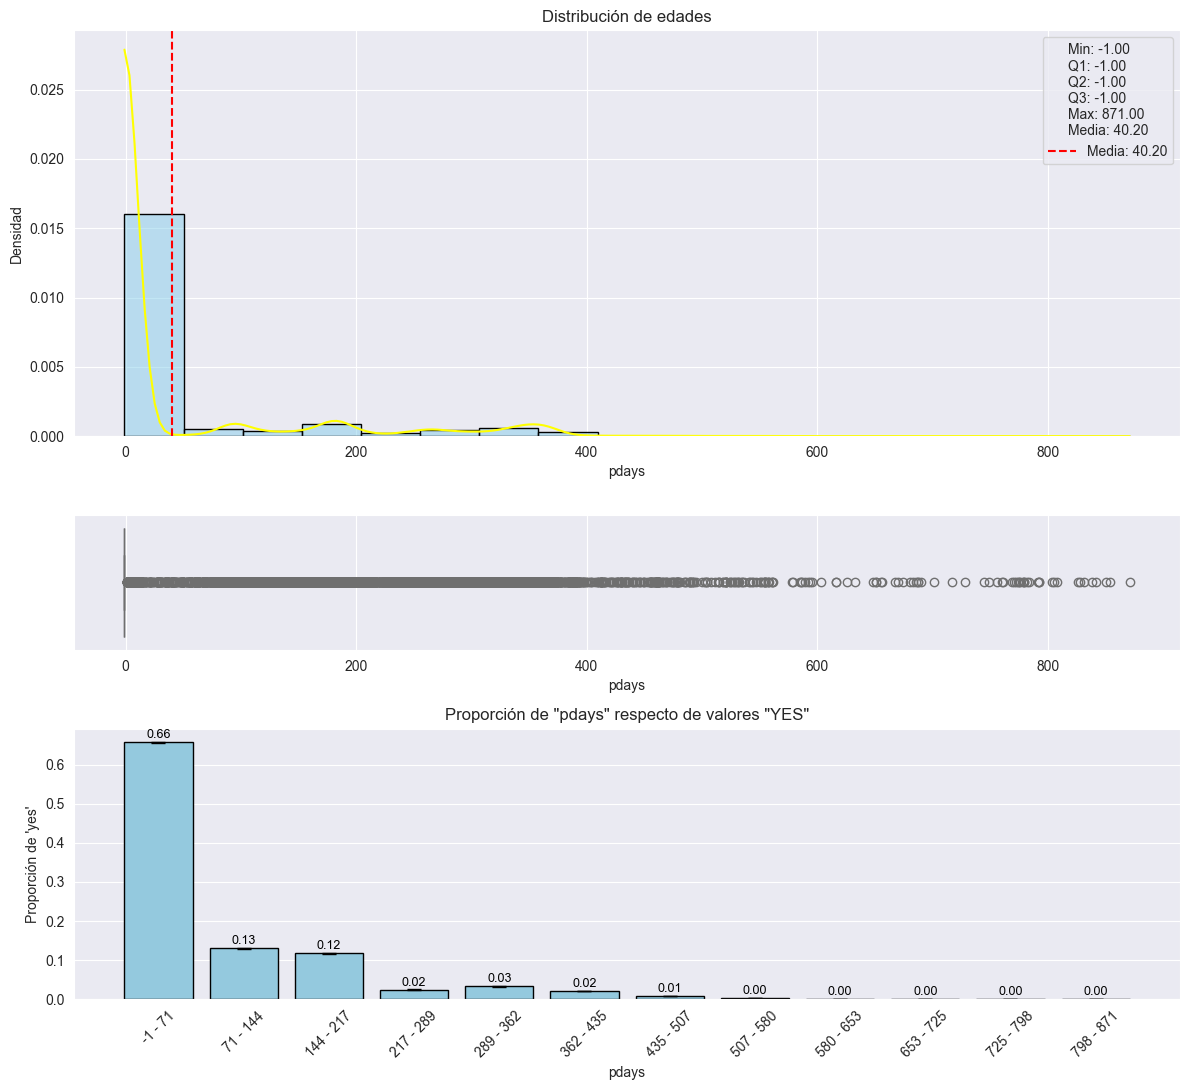

In [46]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df, 'pdays', (10, 12), 'y')
plt.show()

Observemos de nuevo la distribución ignorando los valores de `pdays` que son -1.

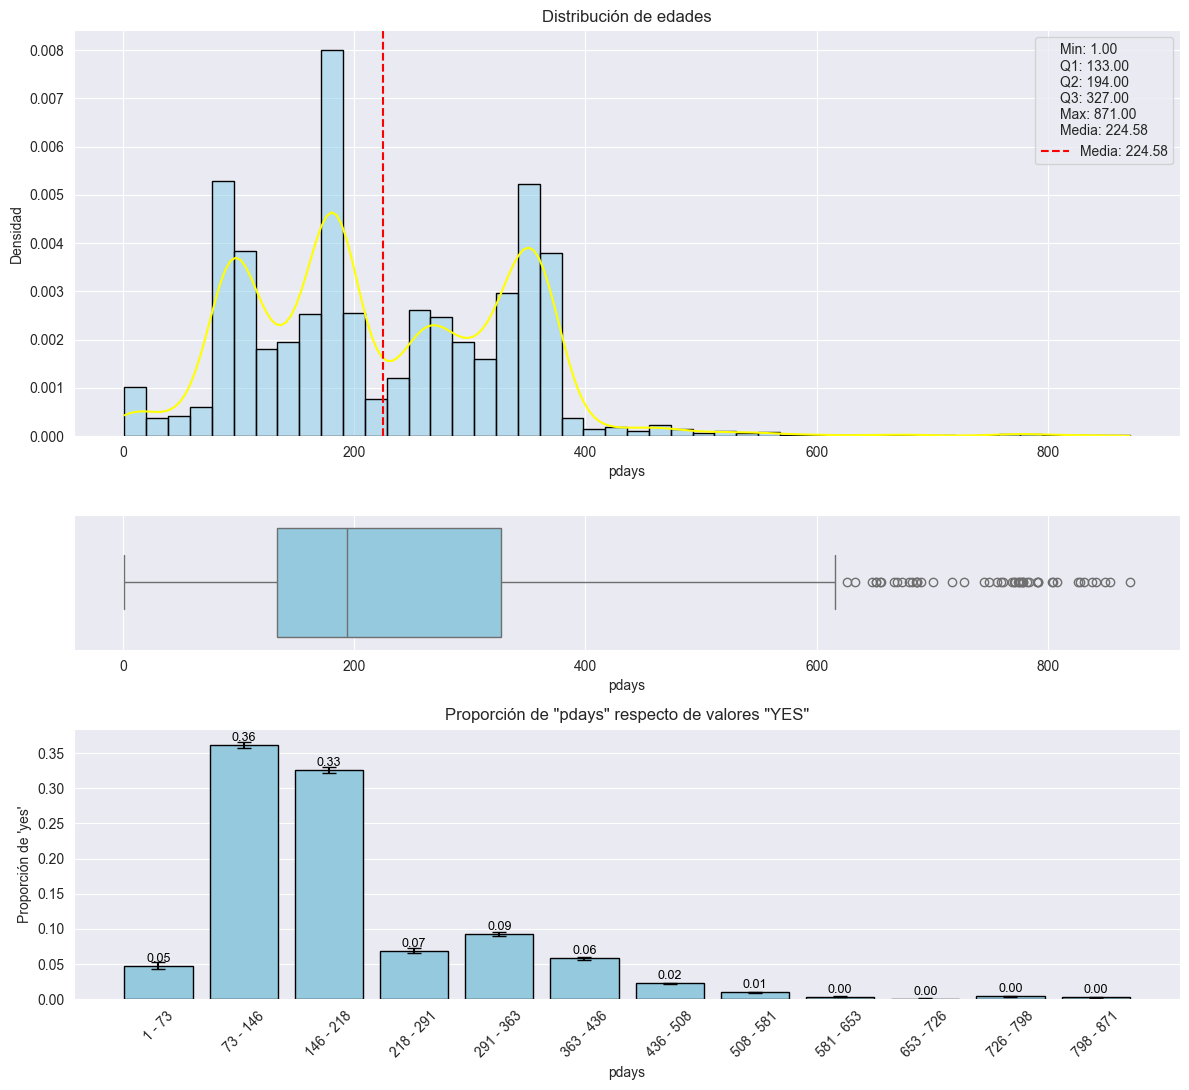

In [47]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df[df['pdays'] != -1].reset_index(drop=True), 'pdays', (10, 12), 'y')
plt.show()

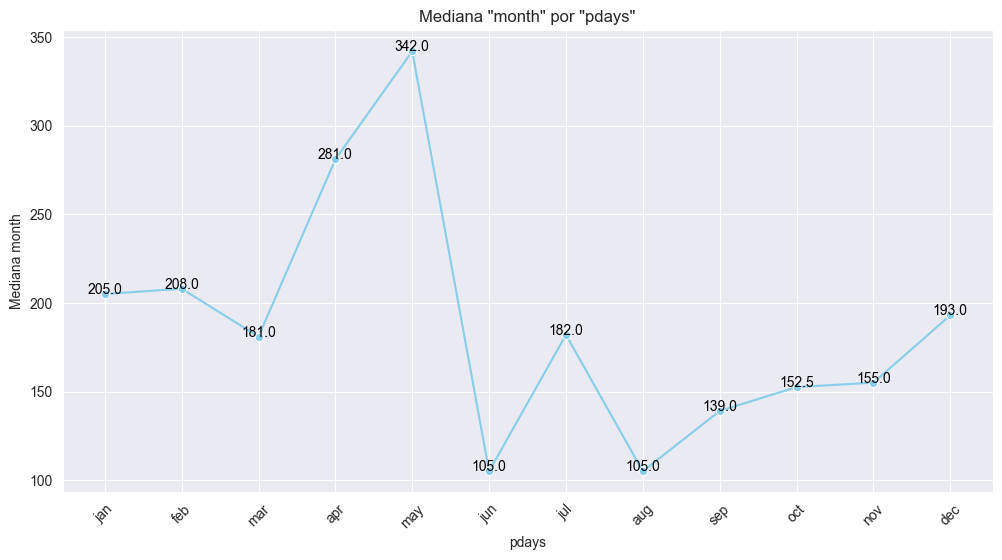

In [48]:
from utils import mediana_por_mes

fig = mediana_por_mes(df[df['pdays'] != -1].reset_index(drop=True), 'pdays')
plt.show()

In [49]:
print(f"Correlación entre duracion y variable objetivo: {df['pdays'].corr(df['y']):.4f}")

Correlación entre duracion y variable objetivo: 0.1036


In [50]:
print(f"Número de clientes contactados en el pasado: {df[df['pdays'] != -1].shape[0]} ({(df[df['pdays'] != -1].shape[0] / df.shape[0]) * 100:.2f}%)")
print(f"Número de clientes no contactados en el pasado: {df[df['pdays'] == -1].shape[0]} ({(df[df['pdays'] == -1].shape[0] / df.shape[0]) * 100:.2f}%)")

Número de clientes contactados en el pasado: 8257 (18.26%)
Número de clientes no contactados en el pasado: 36954 (81.74%)


**Observaciones de `pdays`:**
- La gran mayoria de encuestados no han sido contactados en la campaña anterior
- Ignorando aquellos clientes que no fueron contactados previamente, aquellos que fueron contactados tras 73 a 218 días son los que más contratan el depósito.

#### Característica: `previous` (numérica)

Analicemos la distribución de la variable `previous` y la proporción de personas que han contratado el depósito. Tendremos que hacer uso del objeto `KBinsDiscretizer` de `sklearn` para poder discretizar la variable `previous` y observar su distribución.

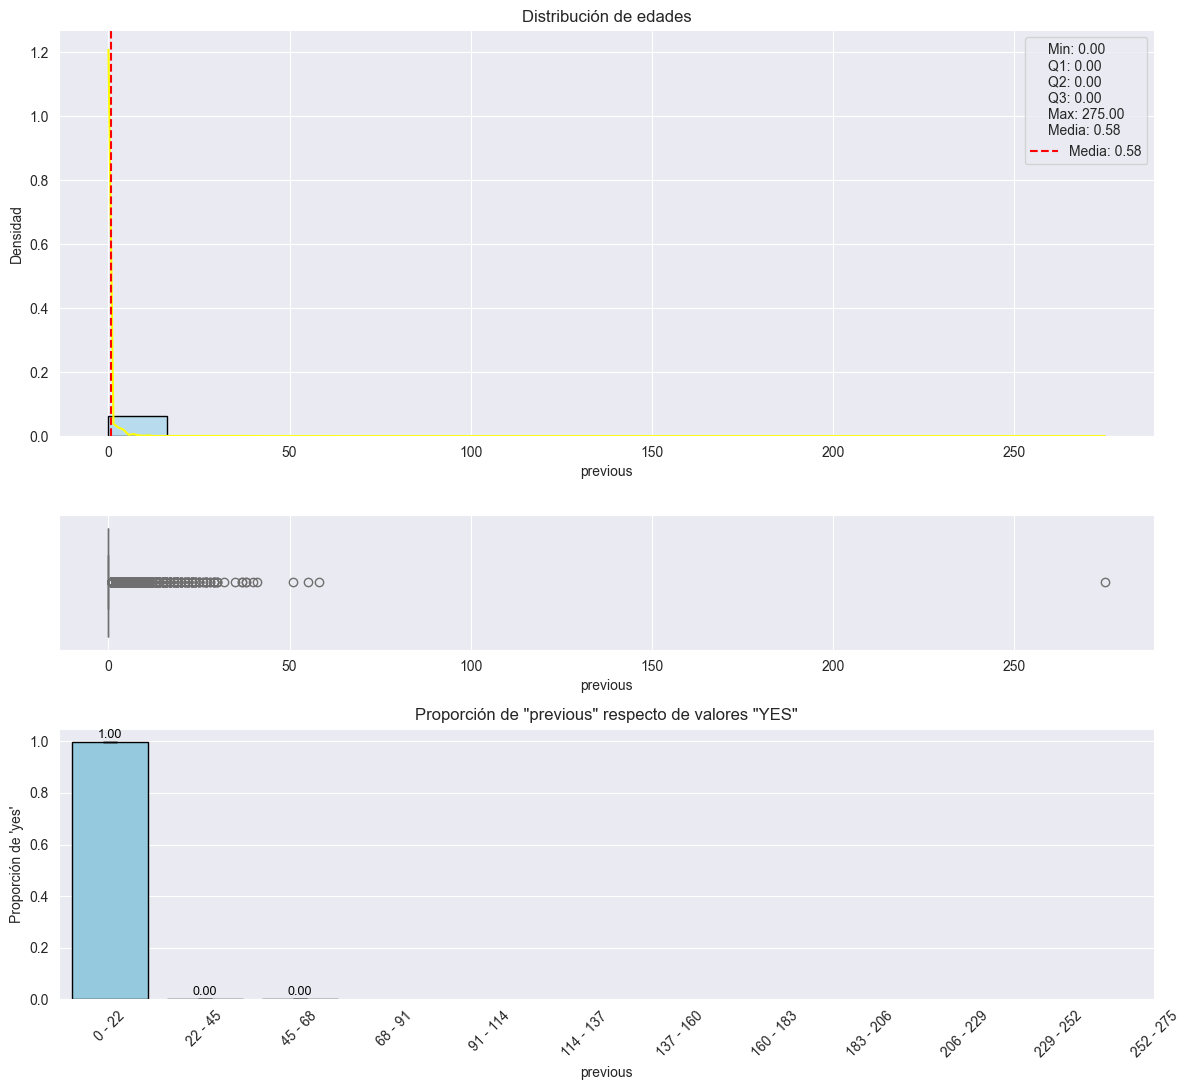

In [51]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df, 'previous', (10, 12), 'y')
plt.show()

Observamos un único outlier que puede que esté teniendo un impacto significativo en la representación de esta variable. Observemos el resto de la distribución ignorando el outlier.

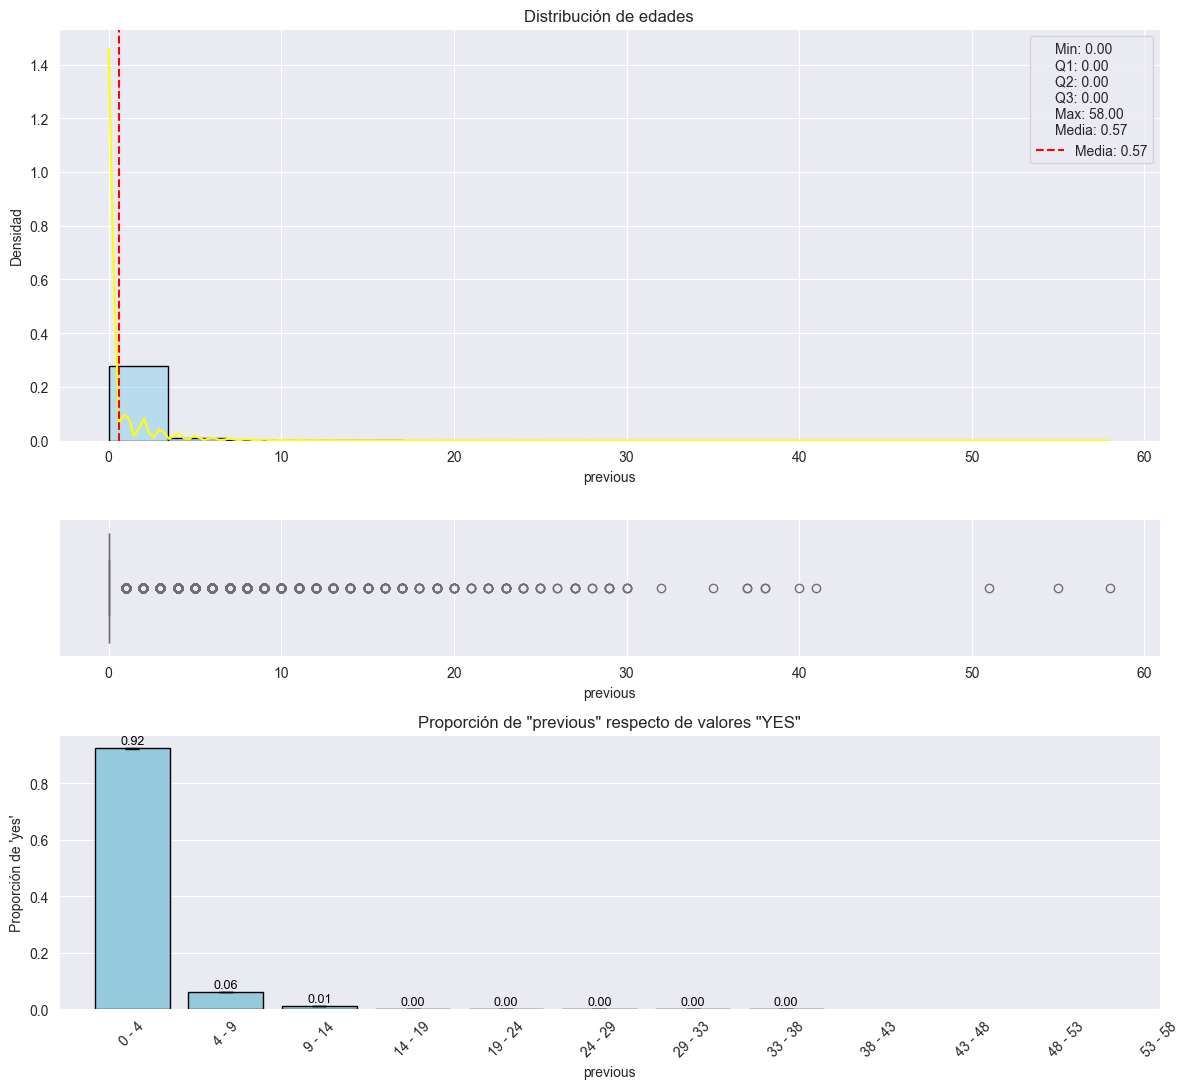

In [52]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df[df['previous'] < 275].reset_index(drop=True), 'previous', (10, 12), 'y')
plt.show()

La gran mayoría de valores se concentran en el primer bloque (0-4). Observemos con más detalle este bloque.

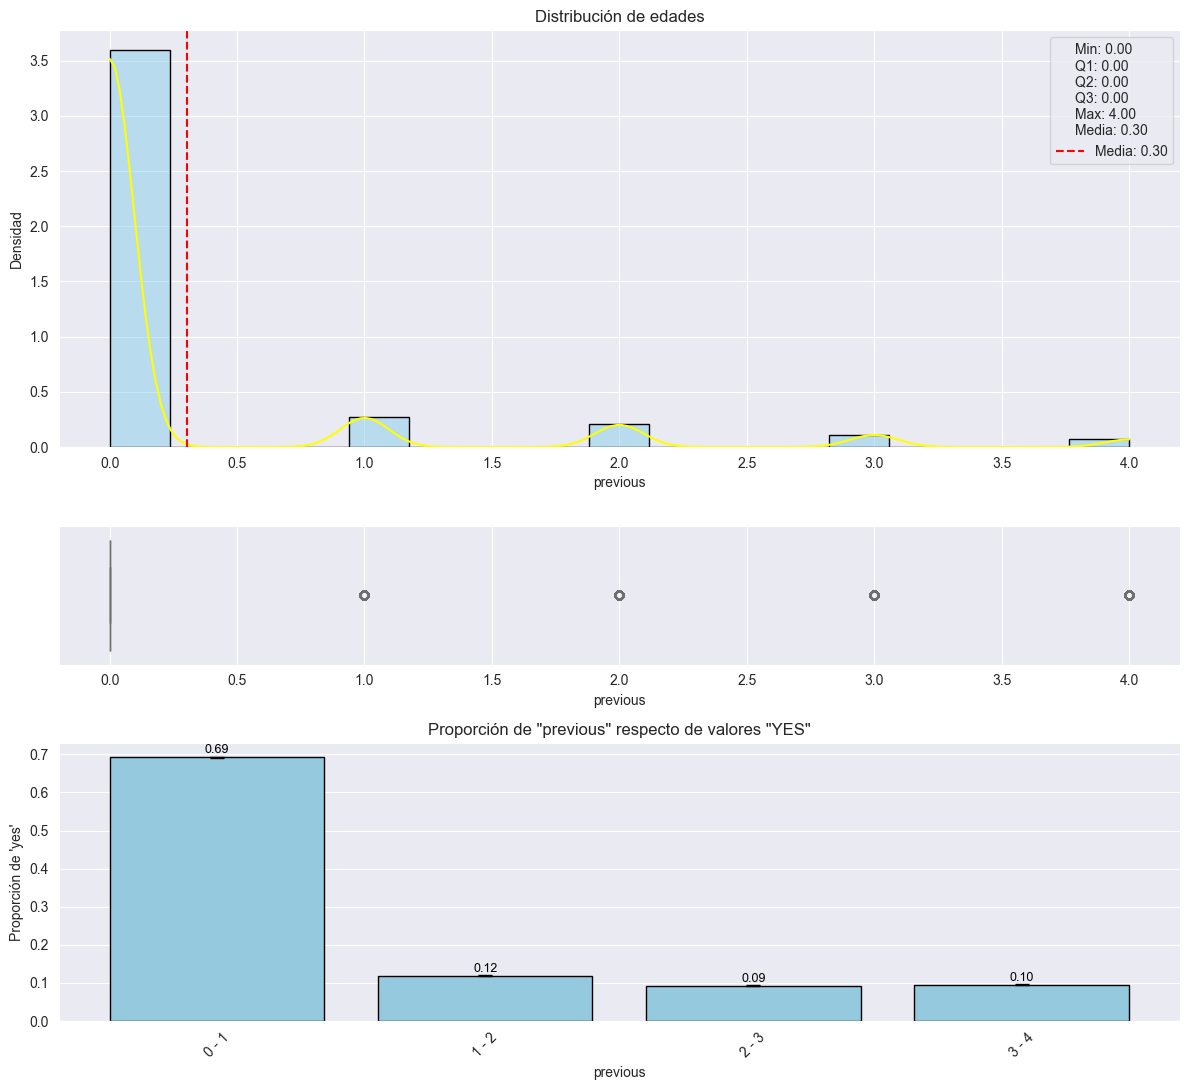

In [53]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df[df['previous'] < 5].reset_index(drop=True), 'previous', (10, 4), 'y')
plt.show()

Casi todos los valores se concentran en el valor 0. Observemos ahora para aquellos mayor que 0.

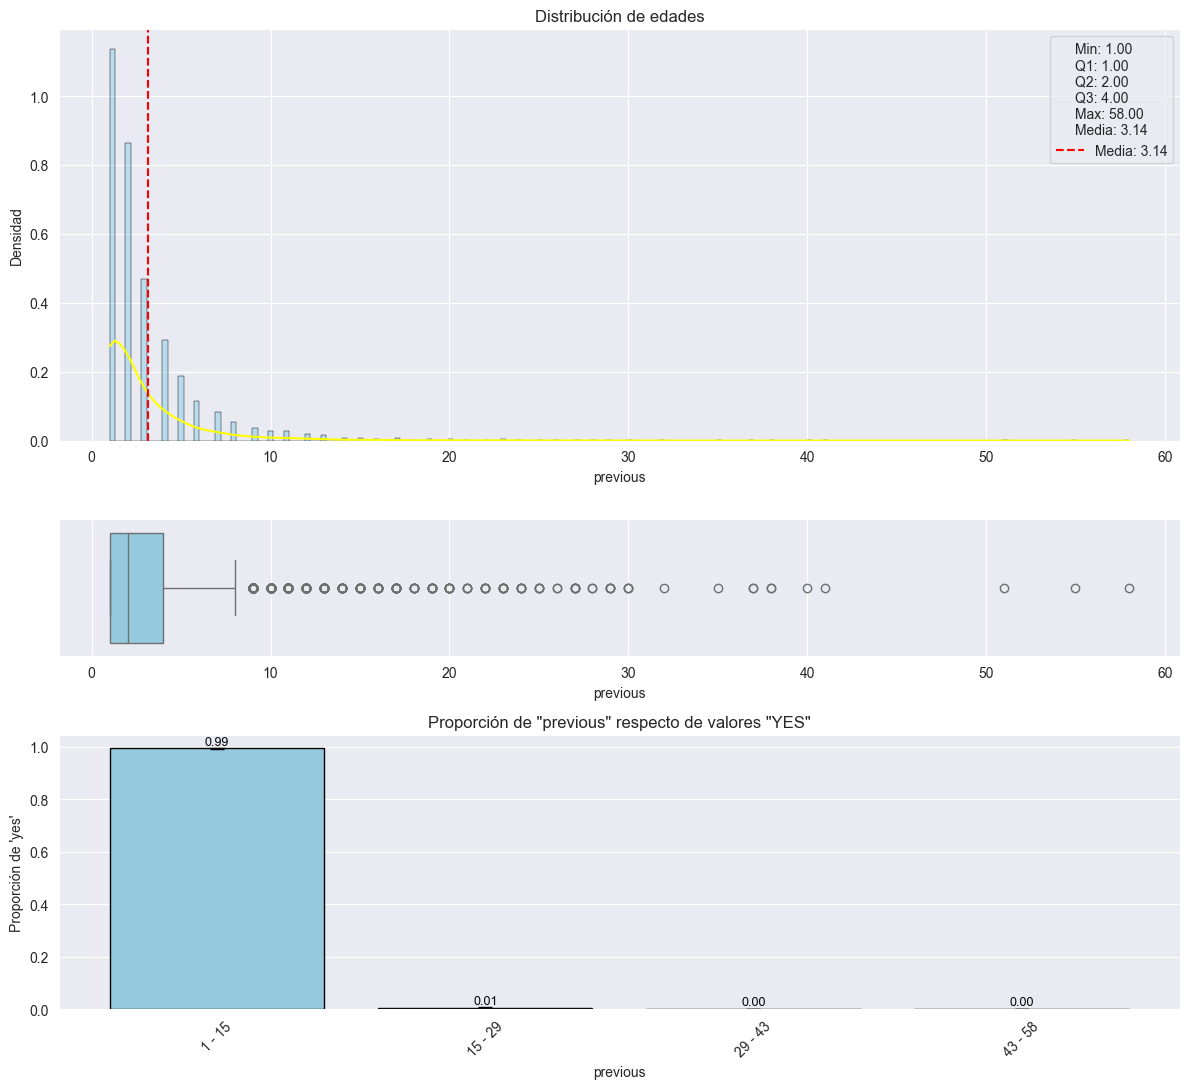

In [54]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df[(df['previous'] > 0) & (df['previous'] < 275)].reset_index(drop=True), 'previous', (10, 4), 'y')
plt.show()

Analicemos el primer bloque

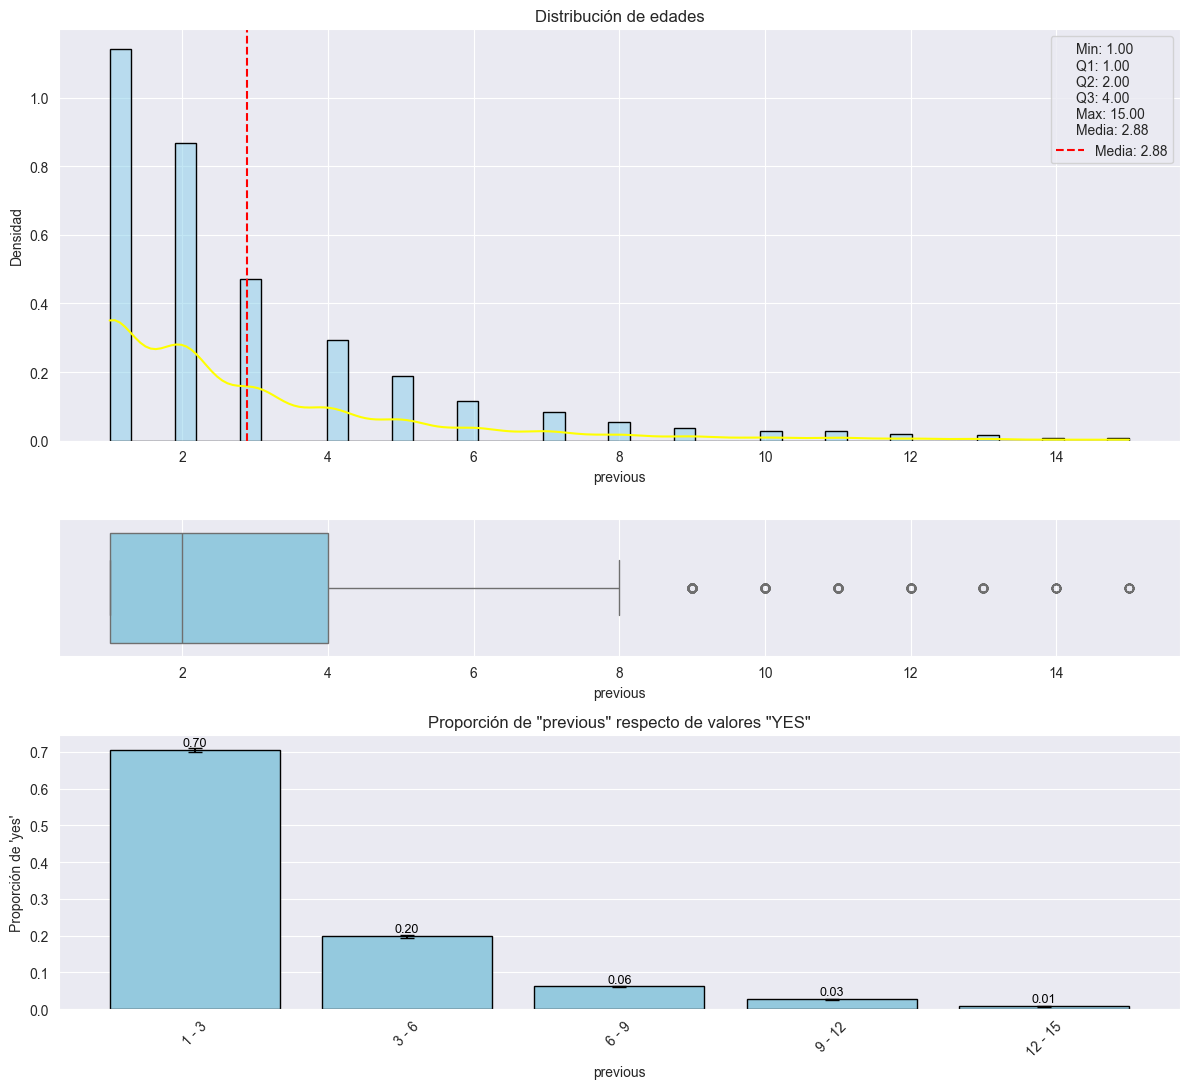

In [55]:
from utils import distribucion_proporcion_numerica

distribucion_proporcion_numerica(df[(df['previous'] > 0) & (df['previous'] < 16)].reset_index(drop=True), 'previous', (10, 5), 'y')
plt.show()

In [56]:
print(f"Correlación entre duracion y variable objetivo: {df['previous'].corr(df['y']):.4f}")

Correlación entre duracion y variable objetivo: 0.0932


**Observaciones de `previous`:**
- La gran mayoría de contactos realizados antes de la campaña para cada cliente son 0.
- Contar con un contacto previo a la campaña no parece ser un factor determinante a la hora de contratar el depósito.
- Es probable que para aquellos contactos previos entre 1 y 4, la proporción de contratación del depósito sea mayor.

#### Característica: `poutcome` (categórica)

Analicemos la distribución de la variable `poutcome` y la proporción de personas que han contratado el depósito.

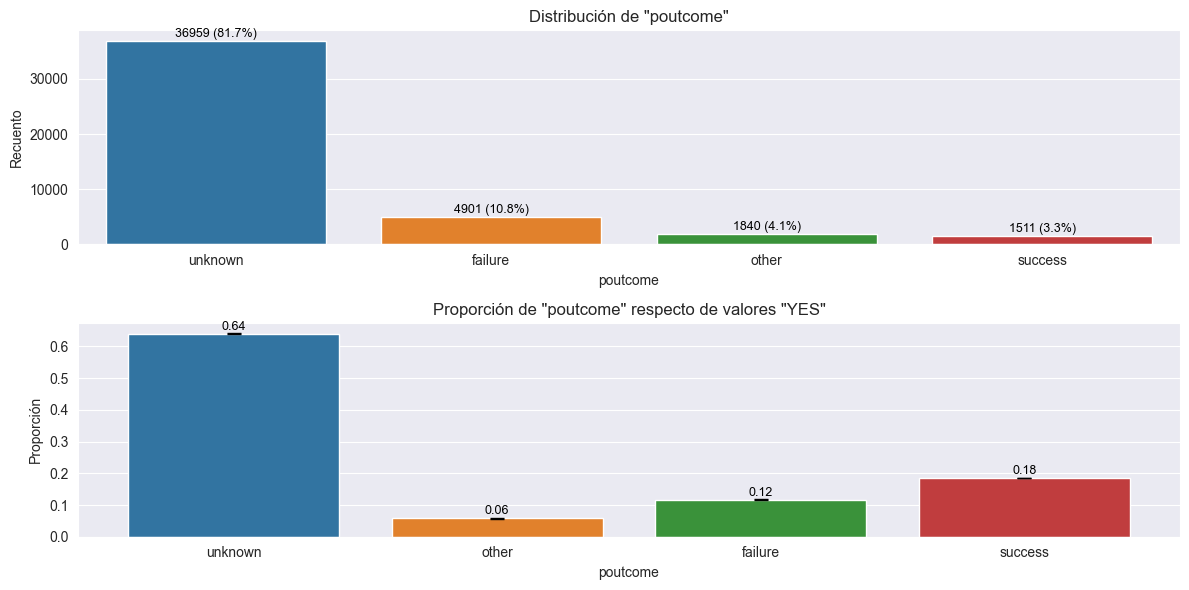

In [57]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df, 'poutcome', 'y')
plt.show()

Analicemos la distribución ignorando los valores de `poutcome` que son `unknown`.

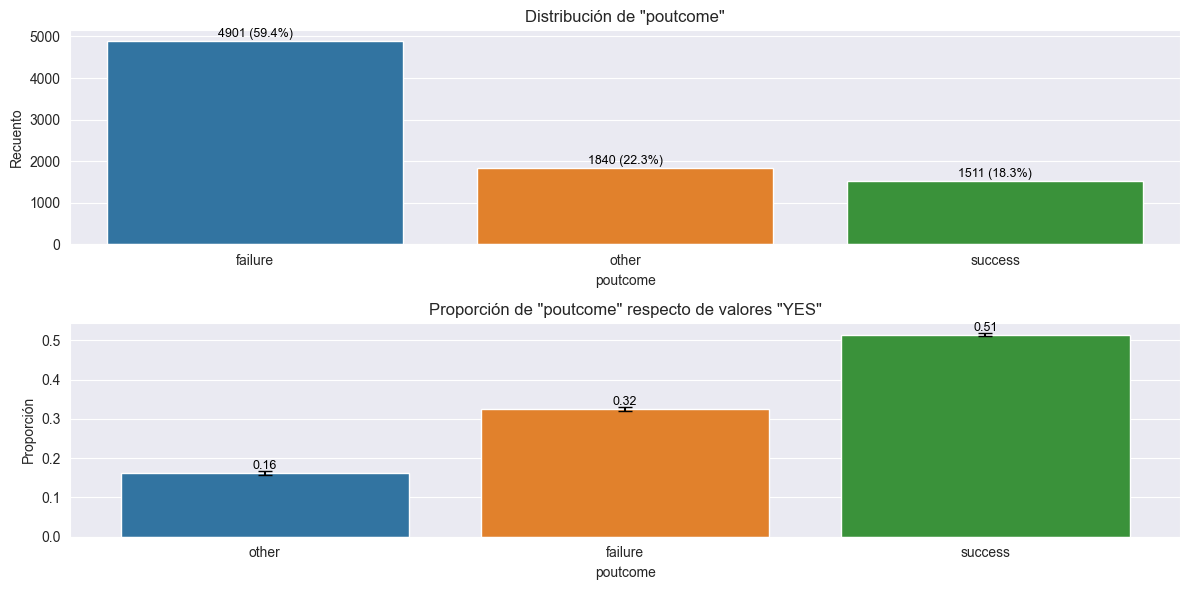

In [58]:
from utils import distribucion_proporcion_categorica
distribucion_proporcion_categorica(df[df['poutcome'] != 'unknown'].reset_index(drop=True), 'poutcome', 'y')
plt.show()

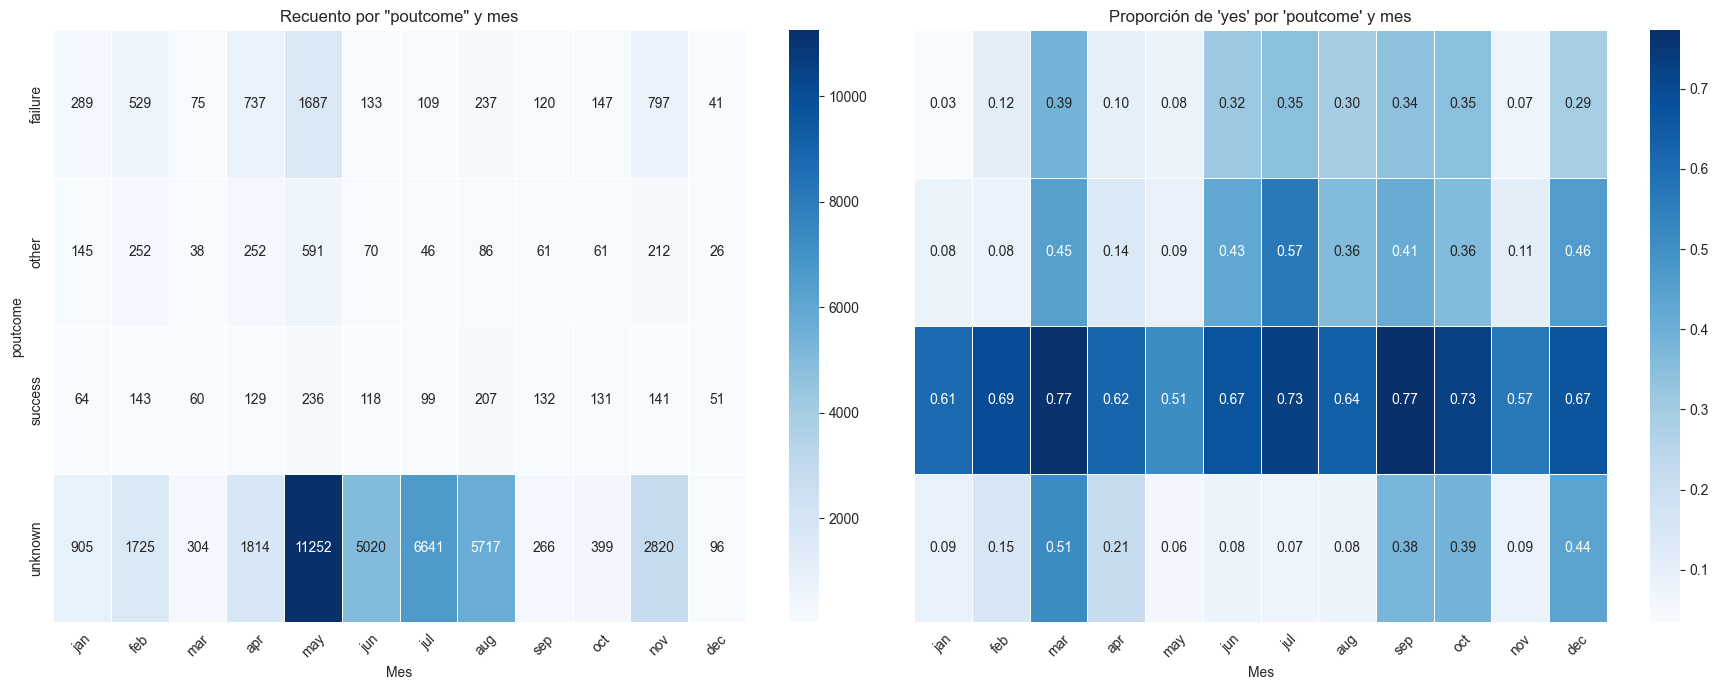

In [59]:
from utils import mapas_de_calor_por_mes
fig = mapas_de_calor_por_mes(df, 'poutcome', 'y')
plt.show()

**Observaciones de `poutcome`:**
- Para muchos de los encuestados se desconoce el resultado de la campaña anterior
- Para aquellos encuestados que se conoce el resultado de la campaña anterior aquellos que contrataron el depósito anteriormente son los que más contratan el depósito.
- En mayo contamos con un gran número de encuestas realizadas donde el `poutcome` es `unknown`, pero la proporción de contratación es demasiado baja (0,06).

## Resumen del Análisis Exploratorio de Datos (EDA)

[[ inicio del documento ]](#índice-de-contenidos)

### Variable Objetivo: `y`
- Tipo: Binaria (`yes` / `no`)
- Observación: Está **desbalanceada**, con una mayoría de respuestas negativas (`no`), lo que puede influir negativamente en el rendimiento de los modelos de machine learning supervisado.

---

### Variables Numéricas

| Variable     | Observaciones relevantes |
|--------------|--------------------------|
| `age`        | Amplio rango de edades, posible presencia de outliers. Distribución sesgada. |
| `duration`   | Alta correlación con `y`, pero no debe usarse para predicción ya que solo se conoce tras la llamada. |
| `campaign`   | Mayoría de valores bajos. Algunos outliers con campañas muy insistentes. |
| `pdays`      | Muchos valores `-1`, lo que indica que el cliente no fue contactado antes. Se puede binarizar. |
| `previous`   | Relacionada con `pdays`. Muchas observaciones con valor cero. |
| `day_of_week`| Representa el día del mes (no de la semana). Distribución uniforme, útil para estacionalidad. |

---

### Variables Categóricas

| Variable     | Observaciones |
|--------------|---------------|
| `job`        | Varias categorías. Tasa de éxito diferente según ocupación. |
| `marital`    | Mayoría `married`, pero `single` tiene mayor tasa de respuesta positiva. |
| `education`  | Diferentes niveles educativos. `tertiary` muestra mejor respuesta. |
| `default`    | Predominantemente `no`. Poco informativa. |
| `housing`    | Los que **no** tienen hipoteca responden mejor. |
| `loan`       | Patrón similar a `housing`: mejor tasa en quienes **no** tienen préstamos personales. |
| `contact`    | Contactar por `cellular` es más efectivo que por `telephone`. |
| `month`      | `may` domina claramente. Existe estacionalidad. |
| `poutcome`   | Campañas anteriores exitosas (`success`) predicen mayor probabilidad de respuesta. Muchos valores `unknown`. |

---

### Matriz de Correlación
- `duration` presenta la correlación más alta con la variable objetivo.
- En general, no hay alta multicolinealidad entre variables numéricas, salvo entre `pdays` y `previous`.

---

### Próximos pasos

- Eliminar `duration` en modelos predictivos de acuerdo a lo mencionado en la documentación.
- Eliminar `poutcome` por su alto porcentaje de valores nulos.
- Imputación de valores nulos en `job`, `education` y `contact` con el valor `other`.
- Discretizar `day_of_week` en 4 intervalos (Un mes tiene 4 semanas aproximadamente).
- Discretizar `age` en 5 intervalos.
- Considerar `pdays` como 4 categorías a partir del IQR (`no_contactado`, `corto`, `medio`, `largo`).
- Aplicar escalado a las variables numéricas (normalización o estandarización).
- Aplicar codificación adecuada a variables categóricas (`One-Hot Encoding`).
- Codificar la variable `y` como binaria (0, 1).
- Considerar técnicas de rebalanceo (`SMOTE`, `undersampling`, etc.) por el desbalance de `y`.
- Realizar un análisis de componentes principales (PCA) para reducir dimensionalidad y mejorar interpretabilidad.

## Limpieza y acondicionamiento de datos

[[ inicio del documento ]](#índice-de-contenidos)



In [60]:
df = bank_marketing.data.original.copy()
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

Separamos las variables independientes de la variable dependiente

In [61]:
X, y = df.drop(columns=['y']), df['y']

### Eliminación de columnas innecesarias

Eliminamos las columnas `duration` y `poutcome` del dataset, ya que no son relevantes para el análisis. La columna `duration` no se puede usar para predecir la variable objetivo según la documentación, y la columna `poutcome` tiene un alto porcentaje de valores desconocidos.

In [62]:
X.shape # antes

(45211, 16)

In [63]:
X.drop(columns=['duration', 'poutcome'], inplace=True)
X.shape # despues

(45211, 14)

### Imputación de valores nulos

Imputamos valores nulos en las columnas `job`, `education` y `contact` aplicando la técnica de la imputación por la moda (valor más frecuente). Para ello, utilizamos el método `SimpleImputer` de `sklearn` con la estrategia `most_frequent`. Esta técnica es adecuada para variables categóricas, ya que permite mantener la distribución original de los datos y evitar la introducción de sesgos. La imputación se realiza de la siguiente manera:

In [64]:
X.isnull().sum() / len(X) # antes

age            0.000000
job            0.006370
marital        0.000000
education      0.041074
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
contact        0.287983
day_of_week    0.000000
month          0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
dtype: float64

In [65]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value='other')
columns = ["job", "education", "contact"]
X[columns] = imputer.fit_transform(X[columns])
X.isnull().sum() / len(X) # despues

age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
balance        0.0
housing        0.0
loan           0.0
contact        0.0
day_of_week    0.0
month          0.0
campaign       0.0
pdays          0.0
previous       0.0
dtype: float64

### Discretización

Discretizamos las variables `age` (uniforme), `day_of_week` (uniforme) y `pdays` (IQR) utilizando el objeto `KBinsDiscretizer` de `sklearn`. Esta técnica permite dividir las variables numéricas en intervalos o "bins", facilitando su análisis y visualización. La discretización se realiza de la siguiente manera:

In [66]:
X[['age', 'day_of_week', 'pdays']]

age  day_of_week  pdays
0       58            5     -1
1       44            5     -1
2       33            5     -1
3       47            5     -1
4       33            5     -1
...    ...          ...    ...
45206   51           17     -1
45207   71           17     -1
45208   72           17    184
45209   57           17     -1
45210   37           17    188

[45211 rows x 3 columns]

In [67]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X['age'] = kbd.fit_transform(X[['age']]).astype(int)

kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X['day_of_week'] = kbd.fit_transform(X[['day_of_week']]).astype(int)

pdays = X['pdays'].copy()
pdays_mask = pdays != -1
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
pdays_contacted = pdays[pdays_mask].values.reshape(-1, 1)
pdays_binned = kbd.fit_transform(pdays_contacted).astype(int)

X['pdays_binned'] = "no_contactado"
X.loc[pdays_mask, 'pdays_binned'] = pd.Series(pdays_binned.flatten(), index=X[pdays_mask].index).map({
    0: "corto",
    1: "medio",
    2: "largo"
})
X['pdays'] = X['pdays_binned']
X.drop(columns=['pdays_binned'], inplace=True)
X[['age', 'day_of_week', 'pdays']]

age  day_of_week          pdays
0        2            0  no_contactado
1        1            0  no_contactado
2        0            0  no_contactado
3        1            0  no_contactado
4        0            0  no_contactado
...    ...          ...            ...
45206    2            2  no_contactado
45207    3            2  no_contactado
45208    3            2          medio
45209    2            2  no_contactado
45210    1            2          medio

[45211 rows x 3 columns]

### Normalización y escalado

Normalizamos y escalamos las variables numéricas utilizando el objeto `StandardScaler` de `sklearn`. Esta técnica es importante para asegurar que todas las variables tengan la misma escala y evitar que algunas dominen el análisis a partir de la siguiente fórmula:

$$ z = \frac{x - \mu}{\sigma} $$


La normalización y escalado se realiza de la siguiente manera:

In [68]:
from sklearn.preprocessing import StandardScaler

numerical_columns = X.select_dtypes(include='number').columns.tolist()

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X[numerical_columns].describe()

age       balance   day_of_week      campaign      previous
count  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04
mean  -8.046667e-17  1.760208e-17 -1.169281e-16  3.017500e-17  4.023334e-17
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00
min   -1.258994e+00 -3.081149e+00 -1.350035e+00 -5.693506e-01 -2.519404e-01
25%   -1.258994e+00 -4.237719e-01 -1.350035e+00 -5.693506e-01 -2.519404e-01
50%    2.716783e-02 -3.002800e-01  4.977063e-01 -2.465603e-01 -2.519404e-01
75%    2.716783e-02  2.158743e-02  4.977063e-01  7.622994e-02 -2.519404e-01
max    3.885654e+00  3.309478e+01  1.421577e+00  1.944365e+01  1.191360e+02

### Codificación de variables categóricas

Aplicaremos `One-Hot Encoding` a las variables categóricas para convertirlas en variables numéricas. Esta técnica es útil para representar variables categóricas como vectores binarios, lo que facilita su uso en modelos de machine learning. Para aquellas variables binarias (`yes`/`no`) configuraremos el codificador para que elimine una de las columnas generadas, ya que para una variable binaria no es necesario tener ambas columnas. La codificación se realiza de la siguiente manera:

In [69]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X.select_dtypes(include='object').columns.tolist()

ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
# get encoded dataframe and merge with X
encoded_values = ohe.fit_transform(X[categorical_columns])
encoded_cols = ohe.get_feature_names_out(categorical_columns)
X_encoded = pd.DataFrame(encoded_values, columns=encoded_cols, index=X.index)
X = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)
X.shape

(45211, 46)

Además como nuestra variable dependiente tambien es categórica haremos uso de `LabelEncoder` para codificar la variable dependiente `y` como binaria (0, 1). La codificación se realiza de la siguiente manera:

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y).flatten()
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Rebalanceo de datos (oversampling)

Realizaremos un rebalanceo de datos utilizando la técnica de `SMOTE` (Synthetic Minority Over-sampling Technique) utilizando la librería `imbalanced-learn` para aumentar la cantidad de instancias de la clase minoritaria. Esta técnica genera nuevas instancias sintéticas de la clase minoritaria, lo que ayuda a equilibrar el conjunto de datos y mejorar el rendimiento del modelo. El rebalanceo se realiza de la siguiente manera:

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X.shape, y.shape, X_resampled.shape, y_resampled.shape

((45211, 46), (45211,), (79844, 46), (79844,))

In [72]:
original_dist = pd.Series(y).value_counts().rename("Original")
resampled_dist = pd.Series(y_resampled).value_counts().rename("SMOTE")
dist_df = pd.concat([original_dist, resampled_dist], axis=1)
dist_df

Original  SMOTE
0     39922  39922
1      5289  39922

Como disponemos de los datos antes y después de aplicar el *oversampling* con `SMOTE` un práctica interesante a la hora de generar los modelos es comprobar si el rendimiento del modelo será mejor tras haber aplicado *oversampling* o no. En la siguiente práctica podremos profundizar mucho más en este área.

## Estudio de Ánalisis de Componentes Principales (PCA)

[[ inicio del documento ]](#índice-de-contenidos)

Crearemos tantos componentes como características tengamos, para poder explicar su valor propio y su varianza. Para ello, utilizaremos la función `PCA` de `sklearn`. La PCA es una técnica de reducción de dimensionalidad que busca transformar un conjunto de variables posiblemente correlacionadas en un conjunto de variables no correlacionadas, denominadas componentes principales. Estos componentes principales son combinaciones lineales de las variables originales y se ordenan de tal manera que el primer componente principal tiene la mayor varianza posible, el segundo componente principal tiene la segunda mayor varianza posible, y así sucesivamente.

Inicialmente trabajaremos con los datos iniciales y posteriormente con los datos rebalanceados tras haber utilizado `SMOTE`. Esto nos permitirá observar si el rendimiento del modelo mejora tras aplicar `SMOTE` o no.

### PCA con datos originales

In [73]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)

ratios = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
criterio_kaiser = eigenvalues > 1
varianza_acumulada = np.cumsum(ratios)

resumen_pca = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(ratios))],
    "Valor Propio": eigenvalues,
    "Varianza Explicada": ratios,
    "Varianza Acumulada": varianza_acumulada,
    "Varianza Explicada Kaiser": criterio_kaiser
})
resumen_pca

Componente  Valor Propio  Varianza Explicada  Varianza Acumulada  \
0         PC1  1.211096e+00        1.335175e-01            0.133517   
1         PC2  1.168951e+00        1.288712e-01            0.262389   
2         PC3  1.052987e+00        1.160867e-01            0.378475   
3         PC4  9.599568e-01        1.058306e-01            0.484306   
4         PC5  8.557718e-01        9.434469e-02            0.578651   
5         PC6  5.753943e-01        6.343443e-02            0.642085   
6         PC7  4.283229e-01        4.722051e-02            0.689306   
7         PC8  3.450412e-01        3.803911e-02            0.727345   
8         PC9  2.668381e-01        2.941760e-02            0.756762   
9        PC10  2.441425e-01        2.691552e-02            0.783678   
10       PC11  1.785175e-01        1.968069e-02            0.803358   
11       PC12  1.538214e-01        1.695806e-02            0.820317   
12       PC13  1.431729e-01        1.578411e-02            0.836101   
13       PC14  1.354437e-01        1.493201e-02            0.851033   
14       PC15  1.273522e-01        1.403996e-02            0.865073   
15       PC16  1.219389e-01        1.344317e-02            0.878516   
16       PC17  1.105863e-01        1.219160e-02            0.890707   
17       PC18  1.018446e-01        1.122788e-02            0.901935   
18       PC19  9.153147e-02        1.009090e-02            0.912026   
19       PC20  8.687772e-02        9.577846e-03            0.921604   
20       PC21  7.807588e-02        8.607486e-03            0.930212   
21       PC22  7.093383e-02        7.820110e-03            0.938032   
22       PC23  6.787226e-02        7.482587e-03            0.945514   
23       PC24  5.649932e-02        6.228775e-03            0.951743   
24       PC25  5.209802e-02        5.743554e-03            0.957487   
25       PC26  5.001676e-02        5.514105e-03            0.963001   
26       PC27  4.804155e-02        5.296348e-03            0.968297   
27       PC28  4.105034e-02        4.525600e-03            0.972823   
28       PC29  3.803843e-02        4.193552e-03            0.977016   
29       PC30  3.367976e-02        3.713030e-03            0.980729   
30       PC31  2.969740e-02        3.273994e-03            0.984003   
31       PC32  2.807506e-02        3.095139e-03            0.987098   
32       PC33  2.639012e-02        2.909382e-03            0.990008   
33       PC34  1.959084e-02        2.159795e-03            0.992168   
34       PC35  1.754486e-02        1.934235e-03            0.994102   
35       PC36  1.733462e-02        1.911058e-03            0.996013   
36       PC37  1.349647e-02        1.487920e-03            0.997501   
37       PC38  1.103437e-02        1.216486e-03            0.998717   
38       PC39  6.616597e-03        7.294477e-04            0.999447   
39       PC40  5.019285e-03        5.533518e-04            1.000000   
40       PC41  9.482602e-17        1.045411e-17            1.000000   
41       PC42  5.988136e-17        6.601629e-18            1.000000   
42       PC43  4.760313e-17        5.248014e-18            1.000000   
43       PC44  3.655444e-17        4.029949e-18            1.000000   
44       PC45  0.000000e+00        0.000000e+00            1.000000   
45       PC46  0.000000e+00        0.000000e+00            1.000000   

    Varianza Explicada Kaiser  
0                        True  
1                        True  
2                        True  
3                       False  
4                       False  
5                       False  
6                       False  
7                       False  
8                       False  
9                       False  
10                      False  
11                      False  
12                      False  
13                      False  
14                      False  
15                      False  
16                      False  
17                      False  
18                      False  
19                      F

De acuerdo con el método de Kaiser, los 3 primeros componentes principales son realmente significativos en el dataset, observemos gráficamente:

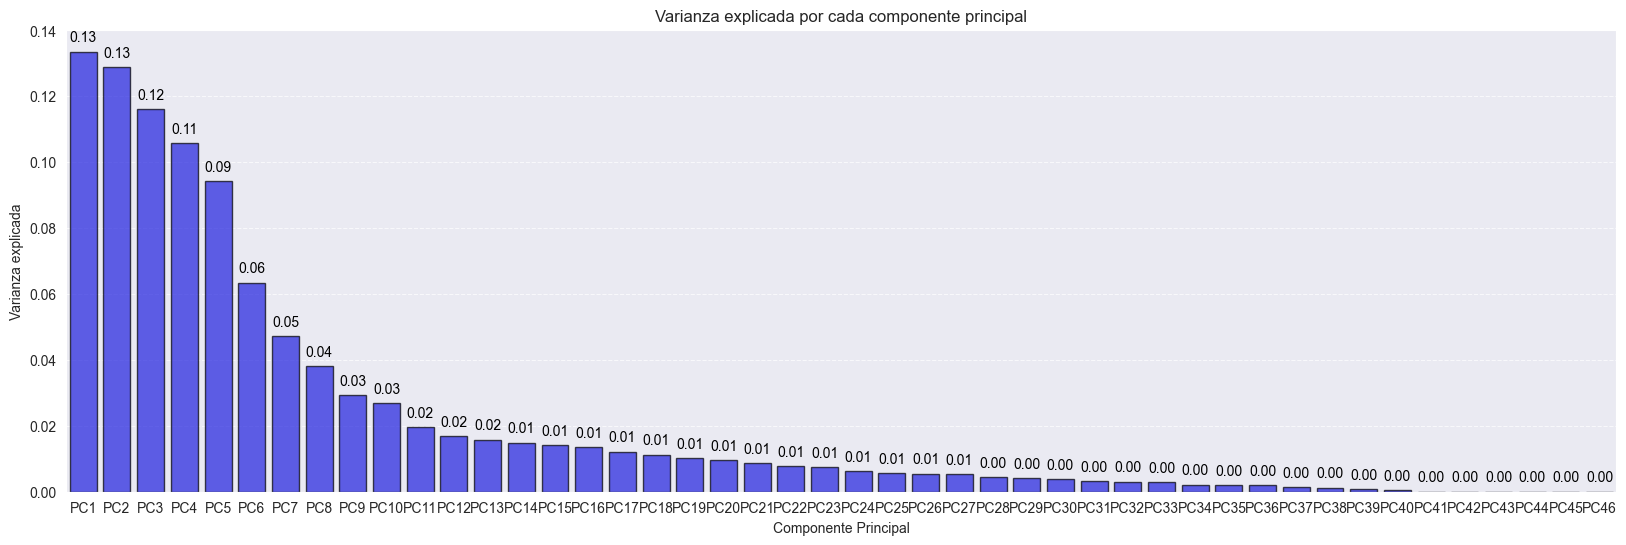

In [74]:
componentes = resumen_pca["Componente"]
varianza_explicada = resumen_pca["Varianza Explicada"]
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=componentes, y=varianza_explicada, color="blue", edgecolor="black", alpha=0.7)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f'{h:.2f}', (p.get_x() + p.get_width() / 2., h), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.title('Varianza explicada por cada componente principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza explicada')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


La aproximáción utilizando el método de Kaiser era bastante acertada, no obstante, podríamos considerar el cuarto y el quinto componente principal como significativo. A partir de este punto, el resto de componentes no aportan información relevante al modelo.

No hay ningún componente principal que destaque significativamente el resto, si tratasemos de reducir la dimensionalidad utilizando PCA, lo más probable es que perdamos una gran cantidad de información, si contamos los primeros 5 componentes principales, la varianza sería del 58% aproximadamente, por lo que un 42% de la información se perdería. No es recomendable aplicar PCA en este caso, ya que la reducción de la dimensionalidad no aportaría un valor significativo al modelo.

### PCA con datos rebalanceados

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

pca = PCA()
pca.fit(X_resampled)

ratios = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
criterio_kaiser = eigenvalues > 1
varianza_acumulada = np.cumsum(ratios)

resumen_pca = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(ratios))],
    "Valor Propio": eigenvalues,
    "Varianza Explicada": ratios,
    "Varianza Acumulada": varianza_acumulada,
    "Varianza Explicada Kaiser": criterio_kaiser
})
resumen_pca

Componente  Valor Propio  Varianza Explicada  Varianza Acumulada  \
0         PC1  1.353698e+00        1.517414e-01            0.151741   
1         PC2  1.233722e+00        1.382927e-01            0.290034   
2         PC3  1.026398e+00        1.150530e-01            0.405087   
3         PC4  9.816960e-01        1.100422e-01            0.515129   
4         PC5  6.750190e-01        7.566553e-02            0.590795   
5         PC6  5.535719e-01        6.205204e-02            0.652847   
6         PC7  3.984424e-01        4.466297e-02            0.697510   
7         PC8  3.221901e-01        3.611555e-02            0.733625   
8         PC9  2.329090e-01        2.610769e-02            0.759733   
9        PC10  2.110712e-01        2.365980e-02            0.783393   
10       PC11  1.614395e-01        1.809639e-02            0.801489   
11       PC12  1.534692e-01        1.720297e-02            0.818692   
12       PC13  1.351529e-01        1.514982e-02            0.833842   
13       PC14  1.236788e-01        1.386364e-02            0.847706   
14       PC15  1.175953e-01        1.318172e-02            0.860887   
15       PC16  1.089690e-01        1.221476e-02            0.873102   
16       PC17  9.742275e-02        1.092050e-02            0.884023   
17       PC18  9.066687e-02        1.016321e-02            0.894186   
18       PC19  8.854110e-02        9.924919e-03            0.904111   
19       PC20  8.789081e-02        9.852026e-03            0.913963   
20       PC21  8.428027e-02        9.447306e-03            0.923410   
21       PC22  7.963721e-02        8.926847e-03            0.932337   
22       PC23  7.115015e-02        7.975499e-03            0.940312   
23       PC24  6.440371e-02        7.219264e-03            0.947532   
24       PC25  5.613159e-02        6.292010e-03            0.953824   
25       PC26  5.141989e-02        5.763857e-03            0.959587   
26       PC27  4.744660e-02        5.318476e-03            0.964906   
27       PC28  4.490292e-02        5.033344e-03            0.969939   
28       PC29  3.720356e-02        4.170293e-03            0.974110   
29       PC30  3.191406e-02        3.577372e-03            0.977687   
30       PC31  2.900242e-02        3.250995e-03            0.980938   
31       PC32  2.797160e-02        3.135446e-03            0.984073   
32       PC33  2.698829e-02        3.025223e-03            0.987099   
33       PC34  2.421635e-02        2.714506e-03            0.989813   
34       PC35  2.357441e-02        2.642548e-03            0.992456   
35       PC36  2.132071e-02        2.389922e-03            0.994846   
36       PC37  2.035381e-02        2.281538e-03            0.997127   
37       PC38  1.186264e-02        1.329730e-03            0.998457   
38       PC39  8.343307e-03        9.352340e-04            0.999392   
39       PC40  5.422960e-03        6.078808e-04            1.000000   
40       PC41  2.024763e-16        2.269636e-17            1.000000   
41       PC42  1.084791e-16        1.215985e-17            1.000000   
42       PC43  4.744446e-17        5.318235e-18            1.000000   
43       PC44  0.000000e+00        0.000000e+00            1.000000   
44       PC45  0.000000e+00        0.000000e+00            1.000000   
45       PC46  0.000000e+00        0.000000e+00            1.000000   

    Varianza Explicada Kaiser  
0                        True  
1                        True  
2                        True  
3                       False  
4                       False  
5                       False  
6                       False  
7                       False  
8                       False  
9                       False  
10                      False  
11                      False  
12                      False  
13                      False  
14                      False  
15                      False  
16                      False  
17                      False  
18                      False  
19                      F

Al igual que en el apartado anterior, de acuerdo con el método de Kaiser, los 3 primeros componentes principales son realmente significativos en el dataset, observemos gráficamente:

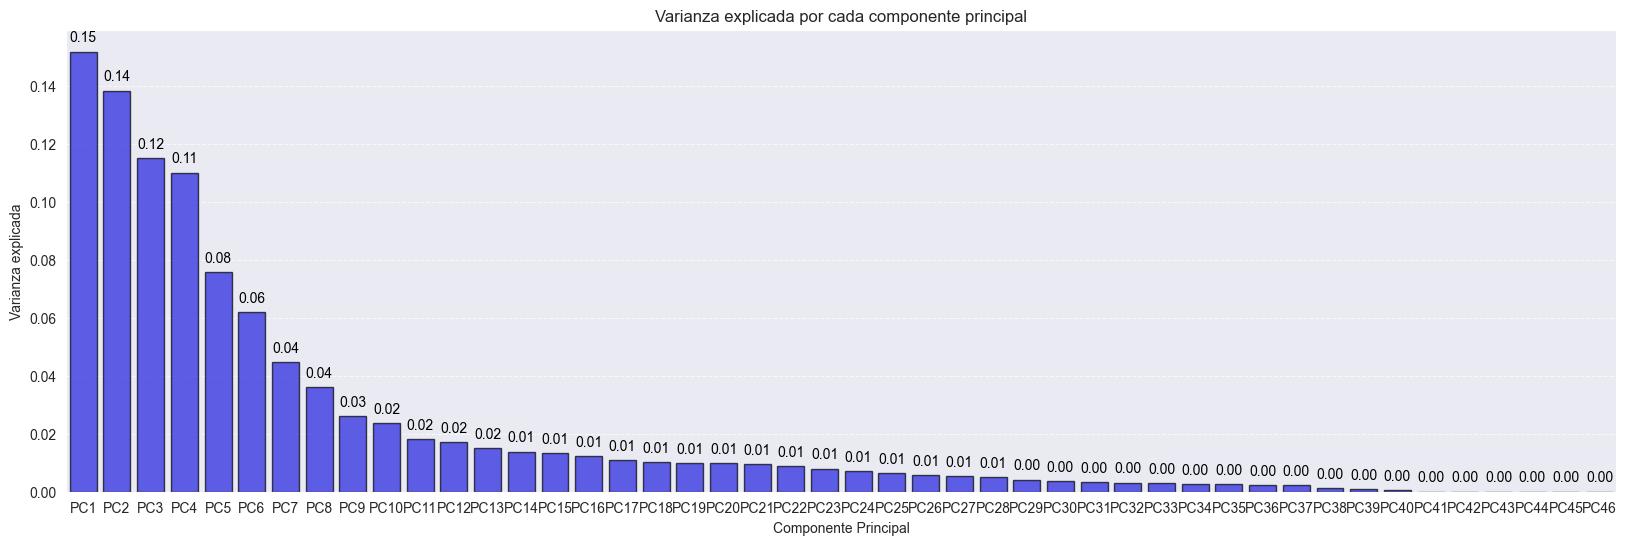

In [76]:
componentes = resumen_pca["Componente"]
varianza_explicada = resumen_pca["Varianza Explicada"]
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=componentes, y=varianza_explicada, color="blue", edgecolor="black", alpha=0.7)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f'{h:.2f}', (p.get_x() + p.get_width() / 2., h), 
                ha='center', va='bottom', fontsize=10, 
color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Varianza explicada por cada componente principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza explicada')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Observamos que no ha habido mucha variación con los datos rebalanceados, no obstante, si consideramos los 5 primeros componentes principales, ahora la varianza es del 59%, hemos logrado incrementar un 1% la varianza. La diferencia para este caso entre aplicar `SMOTE` o no es mínima. En caso de considerar solamente los 4 primeros componentes principales, si que observamos una diferencia en la varianza de un 8% tras aplicar `SMOTE`, pero sigue siendo por debajo del 50% (48% aproximadamente), por lo que no es recomendable aplicar PCA en este caso, ya que la reducción de la dimensionalidad no aportaría un valor significativo al modelo.

## Conclusiones

[[ inicio del documento ]](#índice-de-contenidos)

El análisis realizado sobre el conjunto de datos de marketing bancario ha permitido aplicar un flujo completo de minería de datos, desde la exploración inicial hasta la preparación del dataset para modelado.

Se identificaron variables con alto valor predictivo, se trataron valores nulos y categorías poco informativas, y se aplicaron técnicas de discretización, codificación y escalado para adecuar los datos. El desequilibrio en la variable objetivo se abordó eficazmente mediante técnicas de oversampling.

Aunque se exploró la reducción de dimensionalidad con PCA, se concluyó que no aporta beneficios significativos en este caso, ya que implicaría una pérdida relevante de información.

En conjunto, la práctica demuestra la importancia de un tratamiento cuidadoso de los datos antes del modelado, sentando las bases para desarrollar modelos predictivos fiables y robustos.

### Bibliografía

[[ inicio del documento ]](#índice-de-contenidos)

- [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)
- [UCI Bank Marketing Dataset. Part 1. Exploratory Data Analysis (EDA), by Alex Kataex](https://alexkataev.medium.com/uci-bank-marketing-dataset-part-1-exploratory-data-analysis-eda-f3108f3982b4#:~:text=will%20be%20focused%20on%20my,is%20about%20a%20binary%20classification)
- [ucimlrepo](https://pypi.org/project/ucimlrepo/)
- [pandas](https://pandas.pydata.org/)
- [scikit-learn](https://scikit-learn.org/stable/)
- [imbalanced-learn](https://imbalanced-learn.org/stable/)
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)
- [tabulate](https://pypi.org/project/tabulate/0.5/)
- [pandera](https://pandera.readthedocs.io/en/stable/)